<h1><center> Exoplanets hunting using NASA's data </center></h1>

Exoplanets are planets that orbit stars outside our solar system. These planets are further studies by astrophysicists for possibilities of alien life, and to deepen our understanding of the universe. NASA's Kepler's Objects of Interest(KOI) table can be used to train models to recognize candidates for exoplanets using the properties of KOI objects as features.A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis.

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi

In [3]:
#Importing the data and storing it in a data frame
df=pd.read_csv("Nasa kepler dataset.csv")

In [4]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,0,...,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0.913,0,0,0,0,...,-95.0,4.591,0.015,-0.036,0.763,0.028,-0.028,297.70935,48.080853,9.174
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,-114.0,3.657,0.270,-0.090,2.992,0.416,-0.971,294.35654,38.947380,11.432
4,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,...,-65.0,4.012,0.030,-0.030,1.787,0.132,-0.076,289.73972,44.647419,11.665


In [5]:
df.shape

(8054, 49)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8054 entries, 0 to 8053
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              8054 non-null   int64  
 1   kepoi_name         8054 non-null   object 
 2   kepler_name        2654 non-null   object 
 3   koi_disposition    8054 non-null   object 
 4   koi_pdisposition   8054 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      8054 non-null   int64  
 7   koi_fpflag_ss      8054 non-null   int64  
 8   koi_fpflag_co      8054 non-null   int64  
 9   koi_fpflag_ec      8054 non-null   int64  
 10  koi_period         8054 non-null   float64
 11  koi_period_err1    7904 non-null   float64
 12  koi_period_err2    7904 non-null   float64
 13  koi_time0bk        8054 non-null   float64
 14  koi_time0bk_err1   7904 non-null   float64
 15  koi_time0bk_err2   7904 non-null   float64
 16  koi_impact         7995 

In [7]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,8.054000e+03,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,7.904000e+03,7.904000e+03,8054.000000,...,7892.000000,7995.000000,7907.000000,7907.000000,7995.000000,7907.000000,7907.000000,8054.000000,8054.000000,8053.000000
mean,7.694620e+06,0.480829,0.123541,0.266327,0.217532,0.134964,36.965160,9.433371e-04,-9.433371e-04,157.552492,...,-159.325139,4.319340,0.120810,-0.131408,1.713562,0.322003,-0.390146,292.094710,43.816371,14.312542
std,2.654587e+06,0.476928,0.329078,0.442065,0.412593,0.341706,86.443452,5.009291e-03,5.009291e-03,57.667565,...,74.385486,0.424388,0.133191,0.067308,6.421946,0.884134,2.289483,4.786925,3.603021,1.372742
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.340000e-01,120.565925,...,-1762.000000,0.047000,0.000000,-0.777000,0.109000,0.000000,-116.137000,279.856080,36.577381,6.966000
25%,5.559946e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.404404,4.125000e-06,-1.310000e-04,132.573338,...,-196.000000,4.229000,0.044000,-0.188000,0.827000,0.120000,-0.238000,288.711390,40.779904,13.500000
50%,7.908367e+06,0.334000,0.000000,0.000000,0.000000,0.000000,7.517931,2.430000e-05,-2.430000e-05,135.905285,...,-158.000000,4.438000,0.071000,-0.121000,0.997000,0.233000,-0.111000,292.311525,43.681067,14.572000
75%,9.881662e+06,0.998000,0.000000,1.000000,0.000000,0.000000,23.650820,1.310000e-04,-4.125000e-06,158.646614,...,-106.000000,4.544000,0.149000,-0.087000,1.316000,0.333000,-0.069000,295.909135,46.722810,15.341000
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.340000e-01,-1.100000e-08,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [8]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

Columns description:
* kepid : Unique target identification number, as listed in the Kepler Input Catalog
* kepoi_name : A number used to identify and track a KOI
* kepler_name: Kepler number name in the form "Kepler-N," plus a lower-case letter, identifying the planet. In general, these numbers are easier to remember than the corresponding KOI or KIC/KepID designations and are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.
* koi_disposition:Exoplanet archive disposition, the category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. 
* koi_pdisposition : The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.
* koi_score : A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.
* koi_fpflag_nt : Not Transit-Like Flag, A KOI whose light curve is not consistent with that of a transiting planet
* koi_fpflag_ss : Stellar Eclipse Flag, A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary.
* koi_fpflag_co : Centroid Offset Flag,The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit
* koi_fpflag_ec : Ephemeris Match Indicates Contamination Flag,The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.
* koi_period: Orbital Period (days),The interval between consecutive planetary transits.
* koi_time0bk : The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days.
* koi_impact : The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius
* koi_duration : The duration of the observed transits in hours. Duration is measured from first contact between the planet and star until last contact.
* koi_depth : The fraction of stellar flux lost at the minimum of the planetary transit in ppm.
* koi_prad : The radius of the planet (Earth Radii). 
* koi_teq: Approximation for the temperature of the planet (Kelvin).
* koi_insol : Insolation flux, it's given in units relative to those measured for the Earth from the Sun
* koi_model_snr : Transit depth normalized by the mean uncertainty in the flux during the transits.
* koi_tce_plnt_num : TCE Planet Number federated to the KOI.
* koi_tce_delivname : TCE delivery name corresponding to the TCE data federated to the KOI.
* koi_steff : The photospheric temperature of the star.
* koi_slogg : The base-10 logarithm of the acceleration due to gravity at the surface of the star.
* koi_srad : The photospheric radius of the star
* ra: KIC Right Ascension
* dec: KIC declination
* koi_kepmag : Kepler-band (mag)
The error terms are uncertainities in the measurements of the values.

In [9]:
df['Exoplanet_candidate']=df['koi_pdisposition'].apply(lambda x:1 if x=='CANDIDATE' else 0)
df['Exoplanet_confirmed']=df['koi_disposition'].apply(lambda x:2 if x=='CONFIRMED' else 1 if x=='CANDIDATE' else 0)


In [10]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Exoplanet_candidate,Exoplanet_confirmed
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,0,...,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338,1,2
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463,1,2
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0.913,0,0,0,0,...,0.015,-0.036,0.763,0.028,-0.028,297.70935,48.080853,9.174,1,2
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,0.270,-0.090,2.992,0.416,-0.971,294.35654,38.947380,11.432,1,2
4,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,...,0.030,-0.030,1.787,0.132,-0.076,289.73972,44.647419,11.665,1,1


Let's drop all the id columns and the score column ( as we are trying to predict the predisposition, koi score does not make sense for the test rows) ,duplicate columns and the error columns ( sufficient to consider the approximates)

In [40]:
df.drop(columns=['koi_score','kepoi_name','kepler_name','koi_period_err1','koi_period_err2','koi_impact_err1','koi_impact_err2','koi_duration_err1','koi_duration_err2','koi_depth_err1','koi_depth_err2','koi_prad_err1','koi_prad_err2','koi_insol_err1','koi_insol_err2','koi_steff_err1','koi_steff_err2','koi_slogg_err1','koi_slogg_err2','koi_srad_err1','koi_srad_err2','koi_teq_err1','koi_teq_err2','koi_time0bk_err1','koi_time0bk_err2','kepid','koi_disposition','koi_pdisposition','koi_tce_delivname'],inplace=True)

In [41]:
# Checking for nan values
df.isna().any()

koi_fpflag_nt          False
koi_fpflag_ss          False
koi_fpflag_co          False
koi_fpflag_ec          False
koi_period             False
koi_time0bk            False
koi_impact              True
koi_duration           False
koi_depth               True
koi_prad                True
koi_teq                 True
koi_insol               True
koi_model_snr           True
koi_tce_plnt_num       False
koi_steff               True
koi_slogg               True
koi_srad                True
ra                     False
dec                    False
koi_kepmag              True
Exoplanet_candidate    False
Exoplanet_confirmed    False
dtype: bool

In [42]:
# Removing nan values
df.dropna(inplace=True)

In [43]:
df.shape

(7994, 22)

In [44]:
# Dropping rows with nan or infinity values 
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df= df[indices_to_keep].astype(np.float64)

In [45]:
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,...,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,Exoplanet_candidate,Exoplanet_confirmed
0,0.0,0.0,0.0,0.0,2.470613,122.763305,0.818,1.74319,14230.9,13.04,...,4304.3,1.0,5820.0,4.457,0.964,286.80847,49.316399,11.338,1.0,2.0
1,0.0,1.0,0.0,0.0,2.204735,121.358542,0.224,3.88864,6674.7,16.10,...,5945.9,1.0,6440.0,4.019,1.952,292.24728,47.969521,10.463,1.0,2.0
2,0.0,0.0,0.0,0.0,4.887803,124.813081,0.054,2.36255,4315.8,4.82,...,862.3,1.0,4778.0,4.591,0.763,297.70935,48.080853,9.174,1.0,2.0
3,0.0,1.0,0.0,0.0,3.849372,157.526686,0.915,2.63200,1298.6,12.94,...,132.7,1.0,6244.0,3.657,2.992,294.35654,38.947380,11.432,1.0,2.0
4,0.0,0.0,0.0,0.0,4.780328,132.974086,0.952,2.02530,960.8,7.14,...,380.8,1.0,5937.0,4.012,1.787,289.73972,44.647419,11.665,1.0,1.0


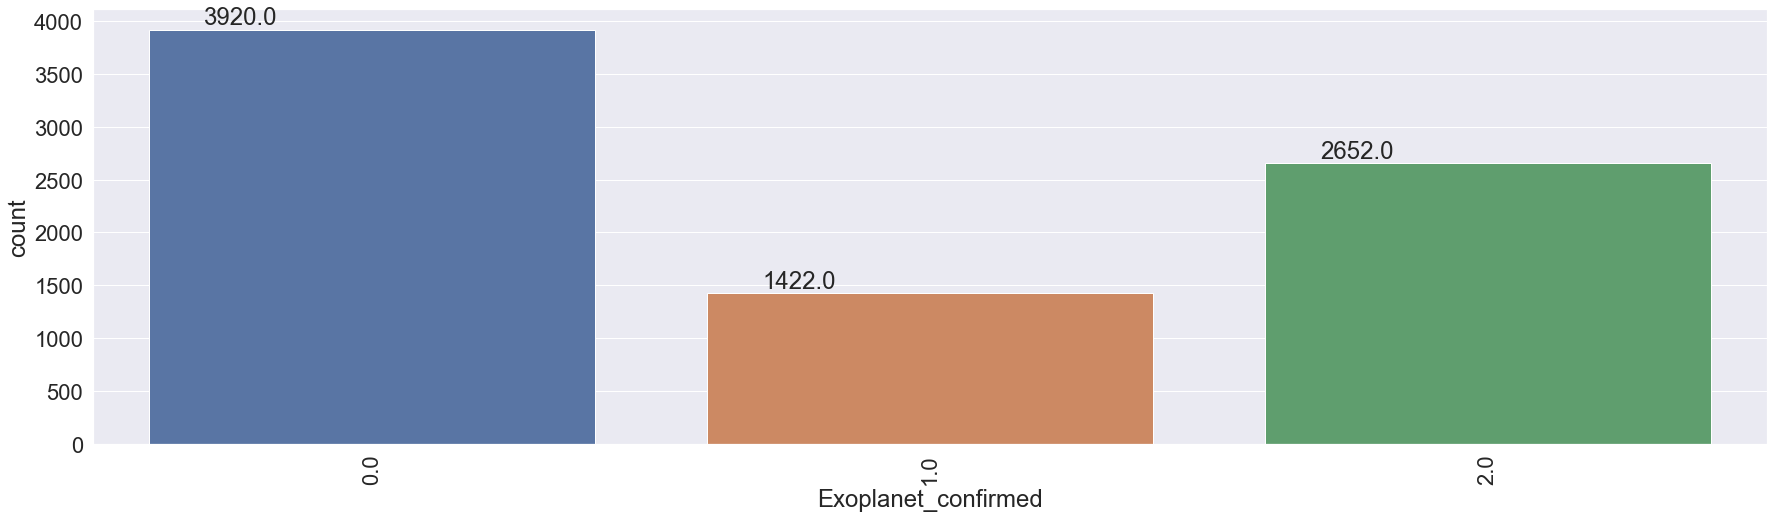

In [46]:
sns.set(rc = {'figure.figsize':(30,8)},font_scale=2)
ax = sns.countplot(x ='Exoplanet_confirmed',data = df)
ticks=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

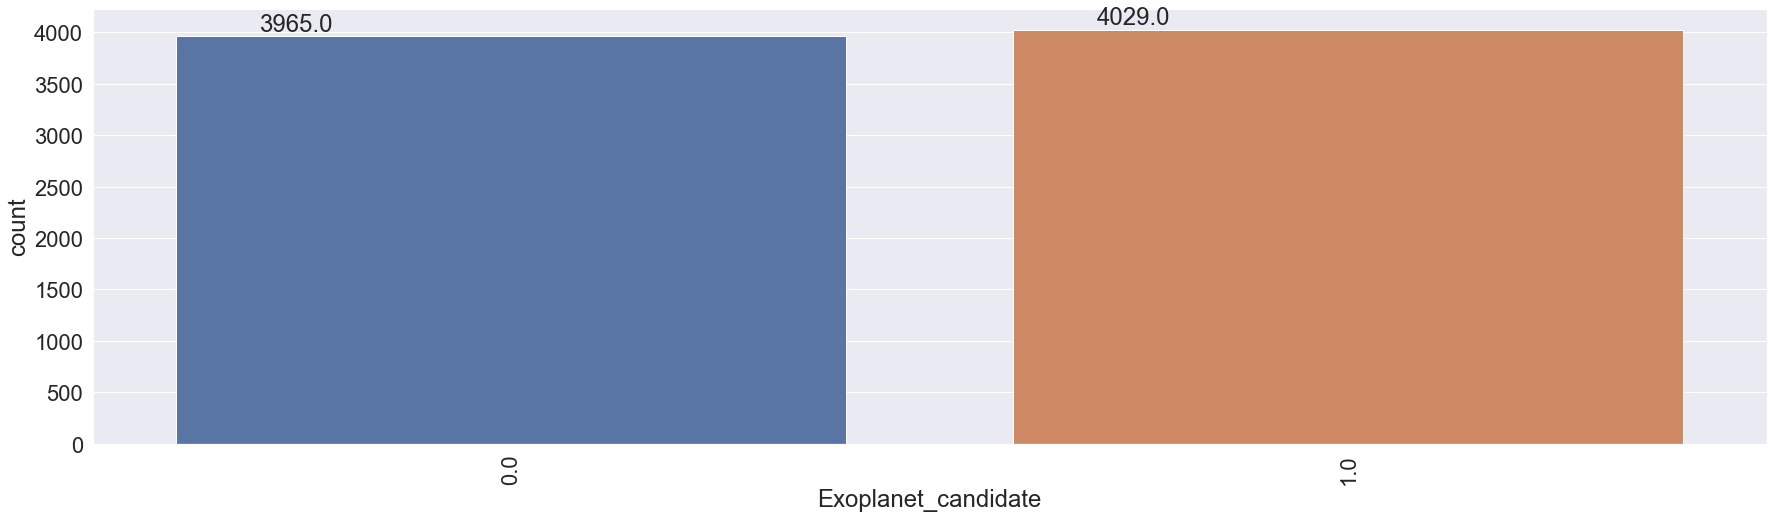

In [18]:
sns.set(rc = {'figure.figsize':(30,8)},font_scale=2)
ax = sns.countplot(x ='Exoplanet_candidate',data = df)
ticks=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

These graphs show us that there are almost equal candidates and non candidates and that among the candidates, almost two thirds are confirmed exoplanets( 2652 out of 4029 candidates)

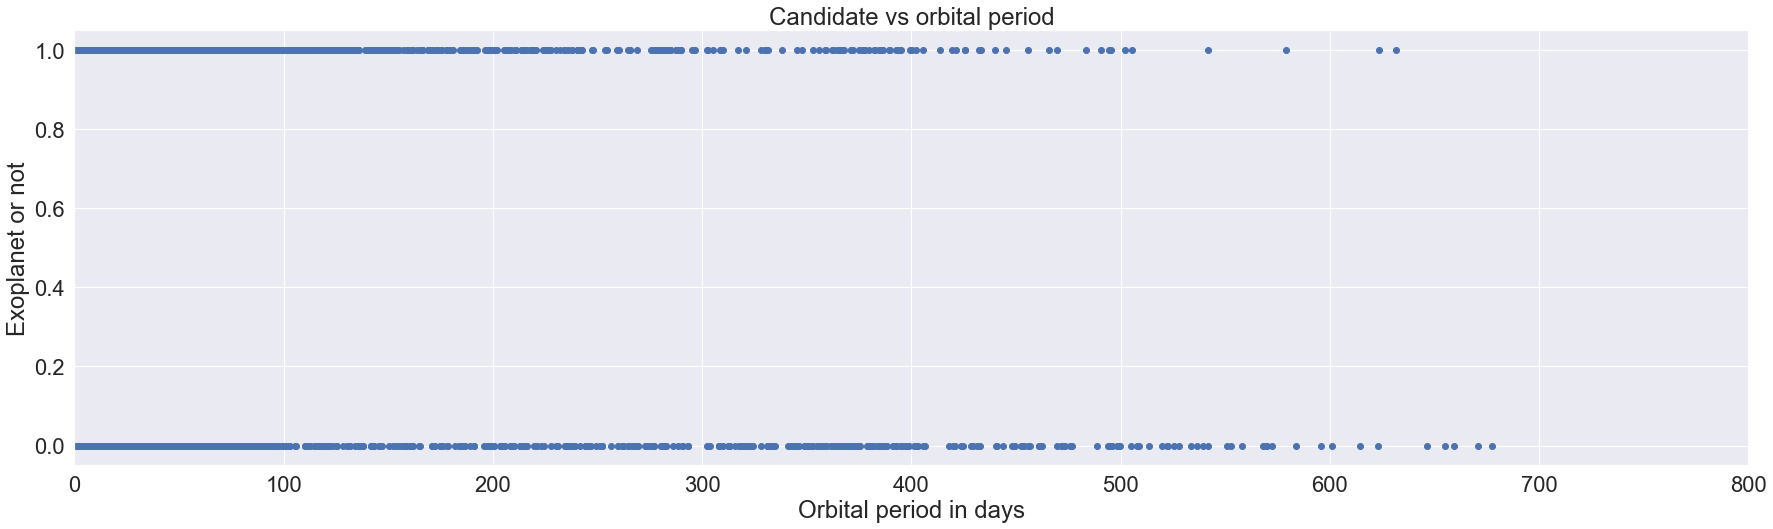

In [19]:
plt.scatter('koi_period','Exoplanet_candidate',data=df)
plt.xlim(0,800)
plt.xlabel("Orbital period in days")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs orbital period")
plt.show()

In [20]:
exo=df.loc[df['Exoplanet_candidate']==1.0]
nonexo=df.loc[df['Exoplanet_candidate']==0.0]


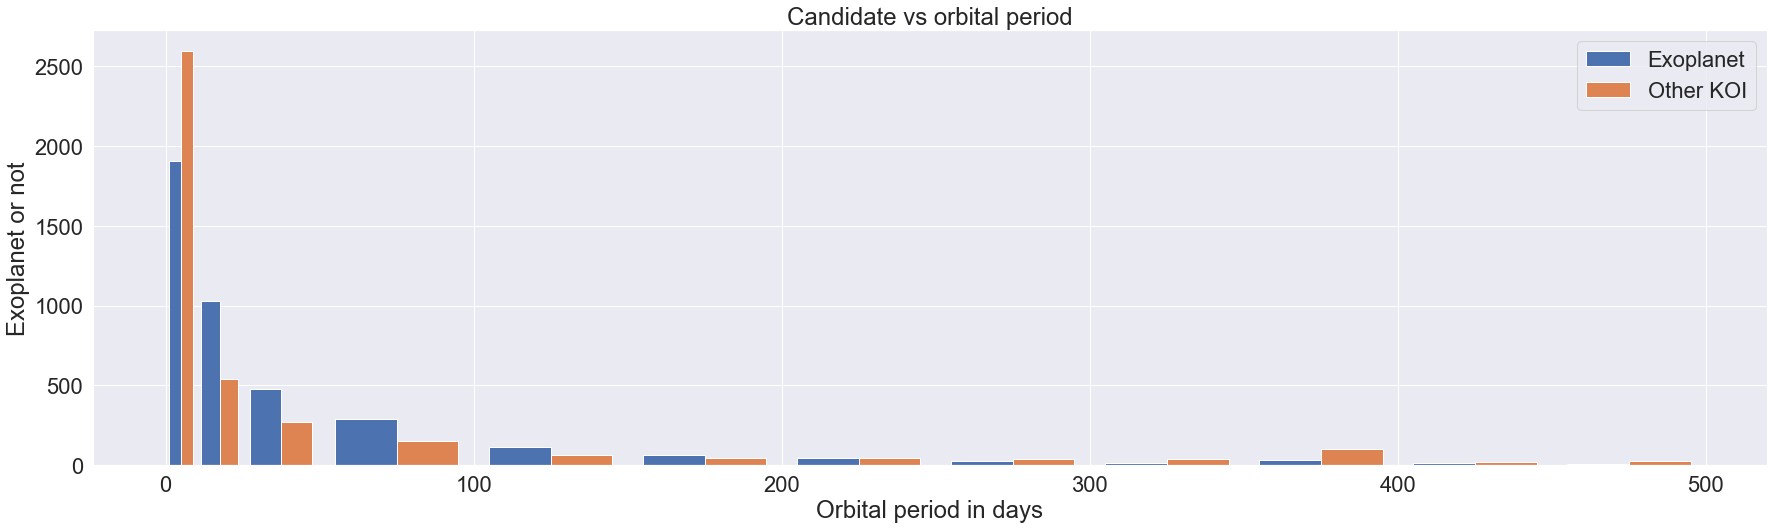

In [21]:
plt.hist([exo['koi_period'],nonexo['koi_period']],bins=[0,10,25,50,100,150,200,250,300,350,400,450,500])
plt.xlabel("Orbital period in days")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs orbital period")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

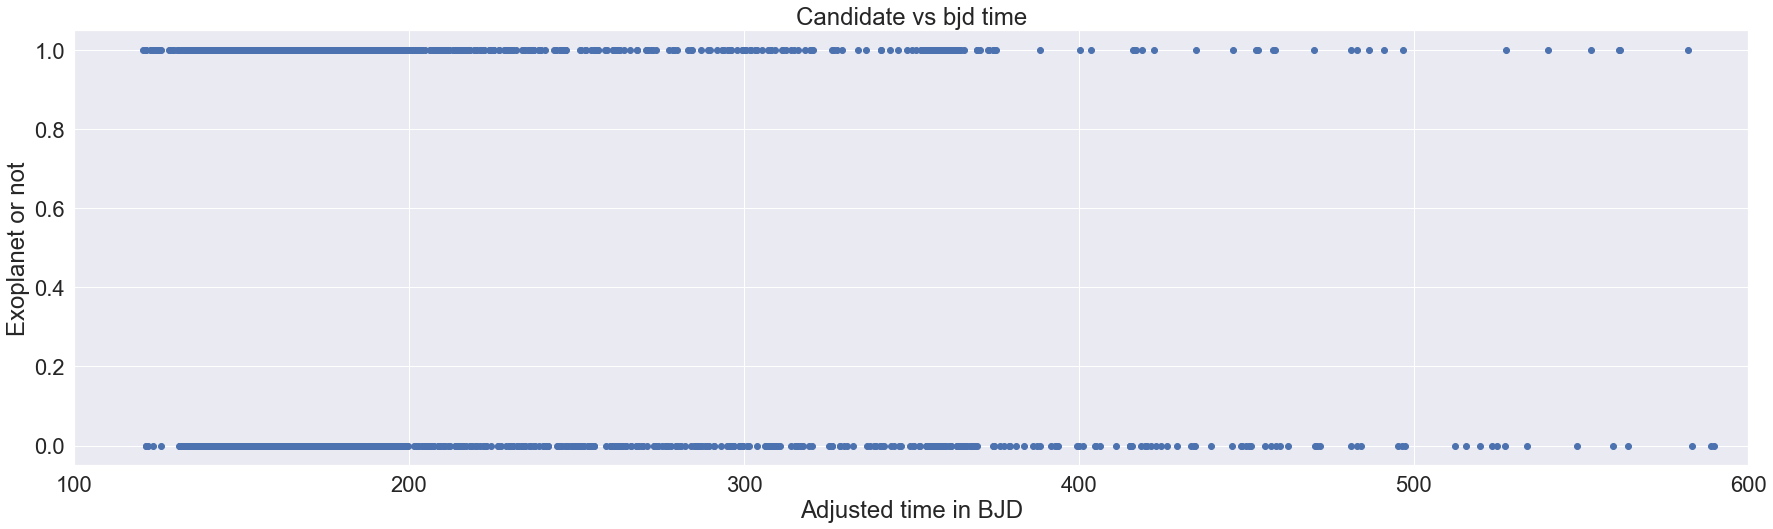

In [22]:
plt.scatter('koi_time0bk','Exoplanet_candidate',data=df)
plt.xlim(100,600)
plt.xlabel("Adjusted time in BJD")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs bjd time")
plt.show()

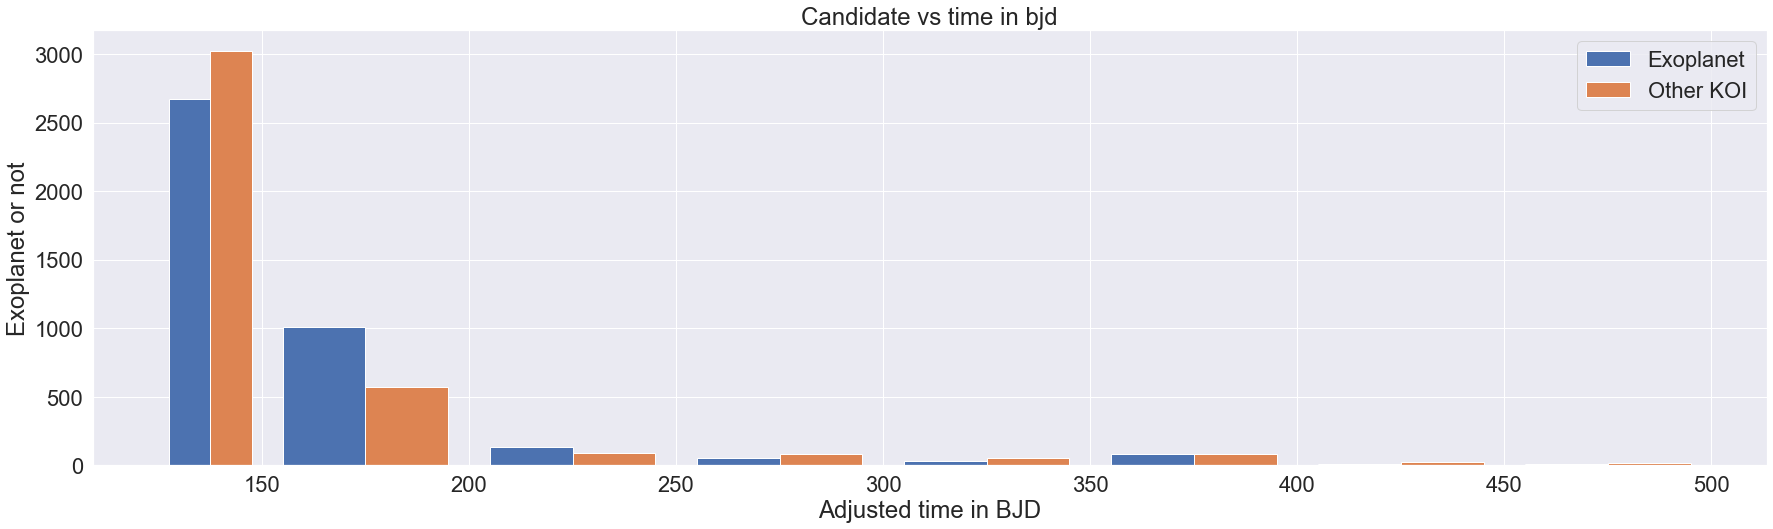

In [23]:
plt.hist([exo['koi_time0bk'],nonexo['koi_time0bk']],bins=[125,125,150,200,250,300,350,400,450,500])
plt.xlabel("Adjusted time in BJD")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs time in bjd")
plt.legend(['Exoplanet','Other KOI'])
plt.show()


Most exoplanets have bjd time in between 100 and 350, a koi with a higher bjd time most probably has no exoplanets

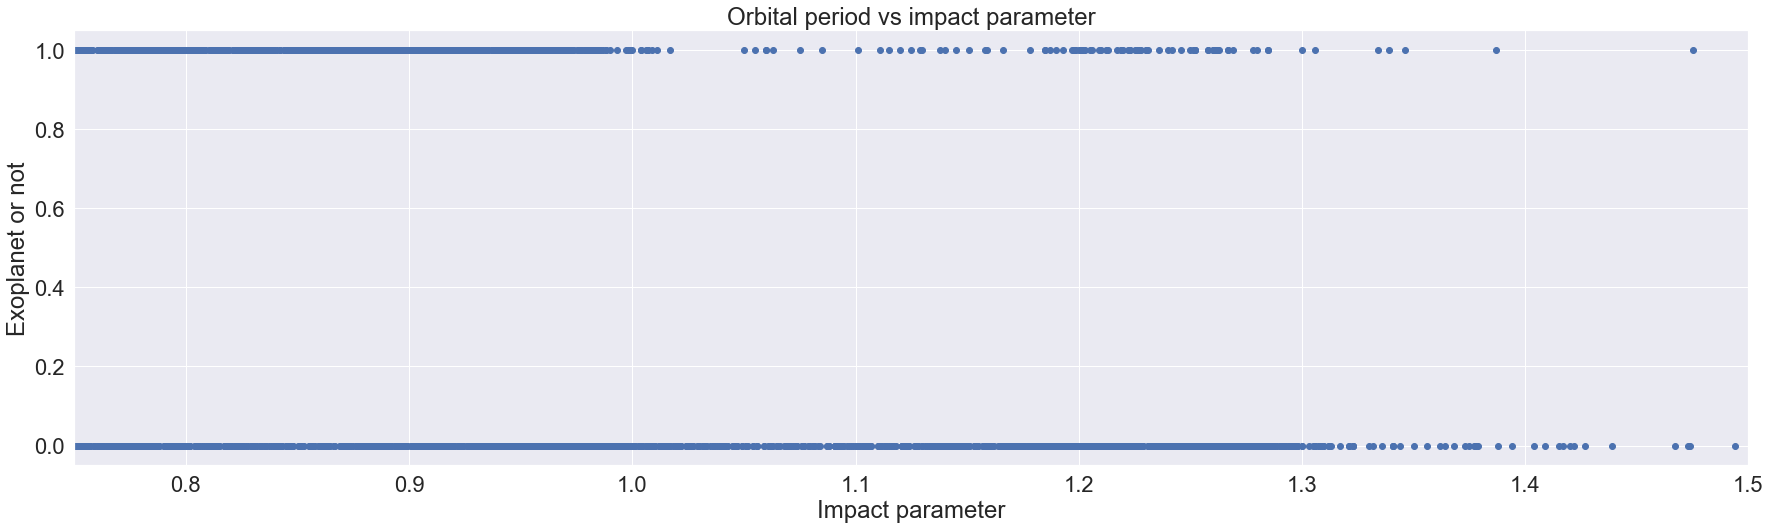

In [24]:
plt.scatter('koi_impact','Exoplanet_candidate',data=df)
plt.xlim(0.75,1.5)
plt.xlabel("Impact parameter")
plt.ylabel("Exoplanet or not")
plt.title("Orbital period vs impact parameter")
plt.show()

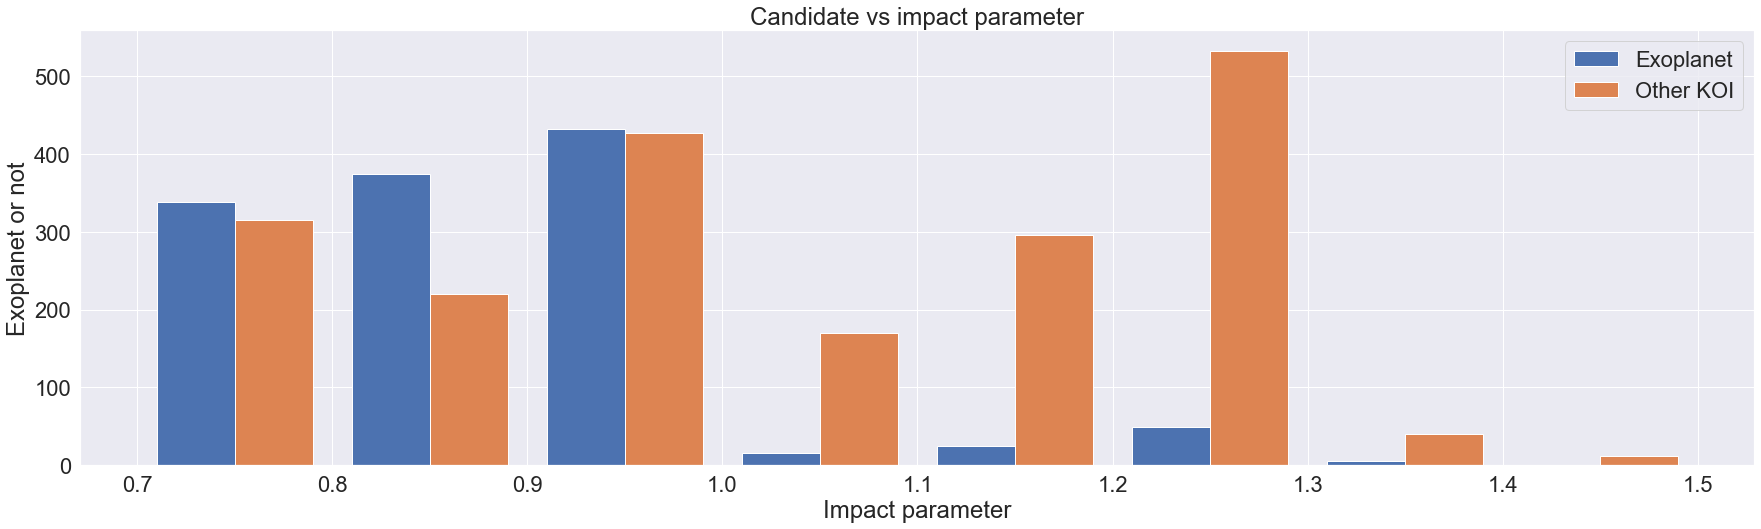

In [25]:
plt.hist([exo['koi_impact'],nonexo['koi_impact']],bins=[0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])
plt.xlabel("Impact parameter")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs impact parameter")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most KOIs with impact parameter above 1 are not exoplanets.

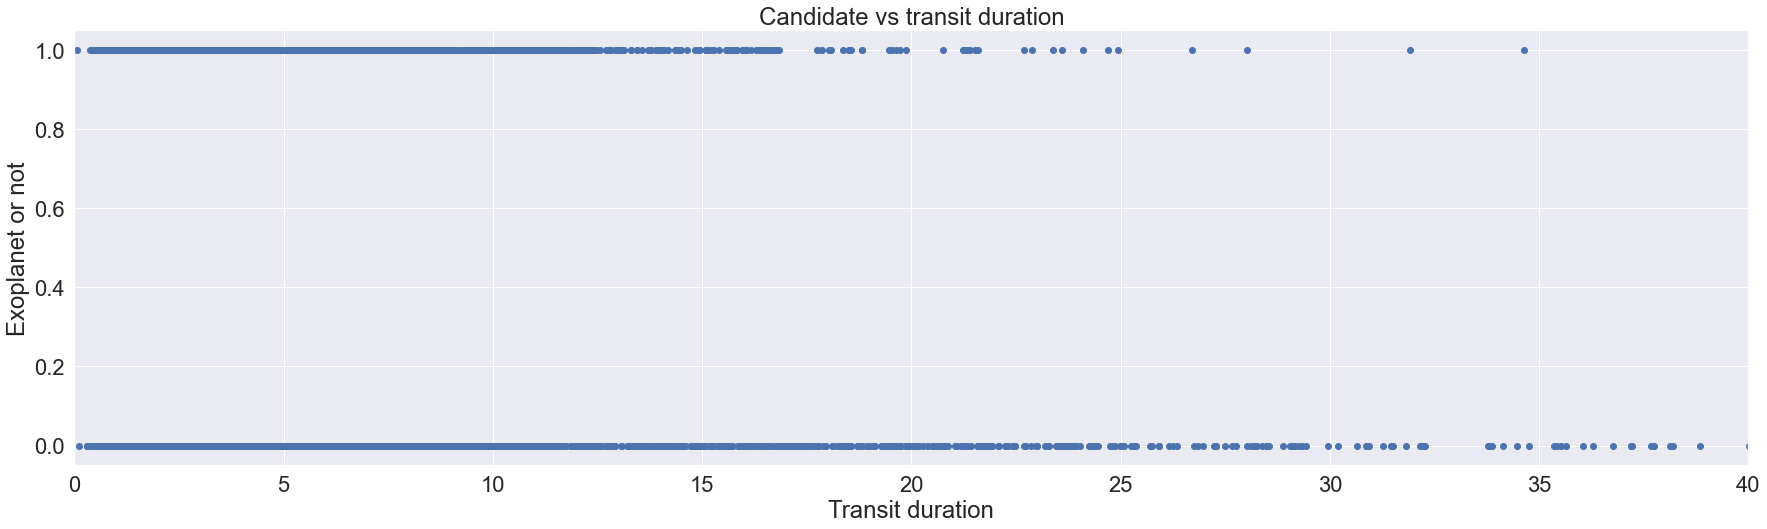

In [26]:
plt.scatter('koi_duration','Exoplanet_candidate',data=df)
plt.xlabel("Transit duration")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs transit duration")
plt.xlim(0,40)
plt.show()

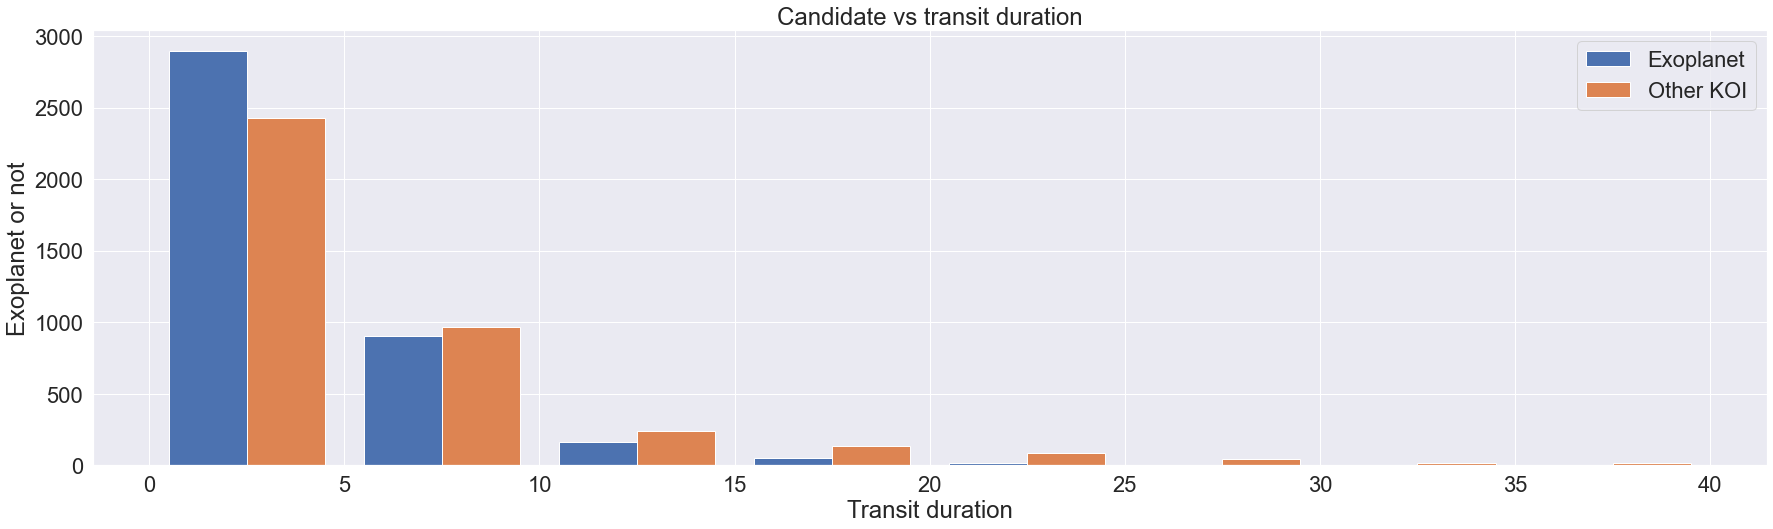

In [27]:
plt.hist([exo['koi_duration'],nonexo['koi_duration']],bins=[0,5,10,15,20,25,30,35,40])
plt.xlabel("Transit duration")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs transit duration")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most exoplanets have a transit duration of less than 15 hours and any KOI with a higher duration are most probably not exoplanets.

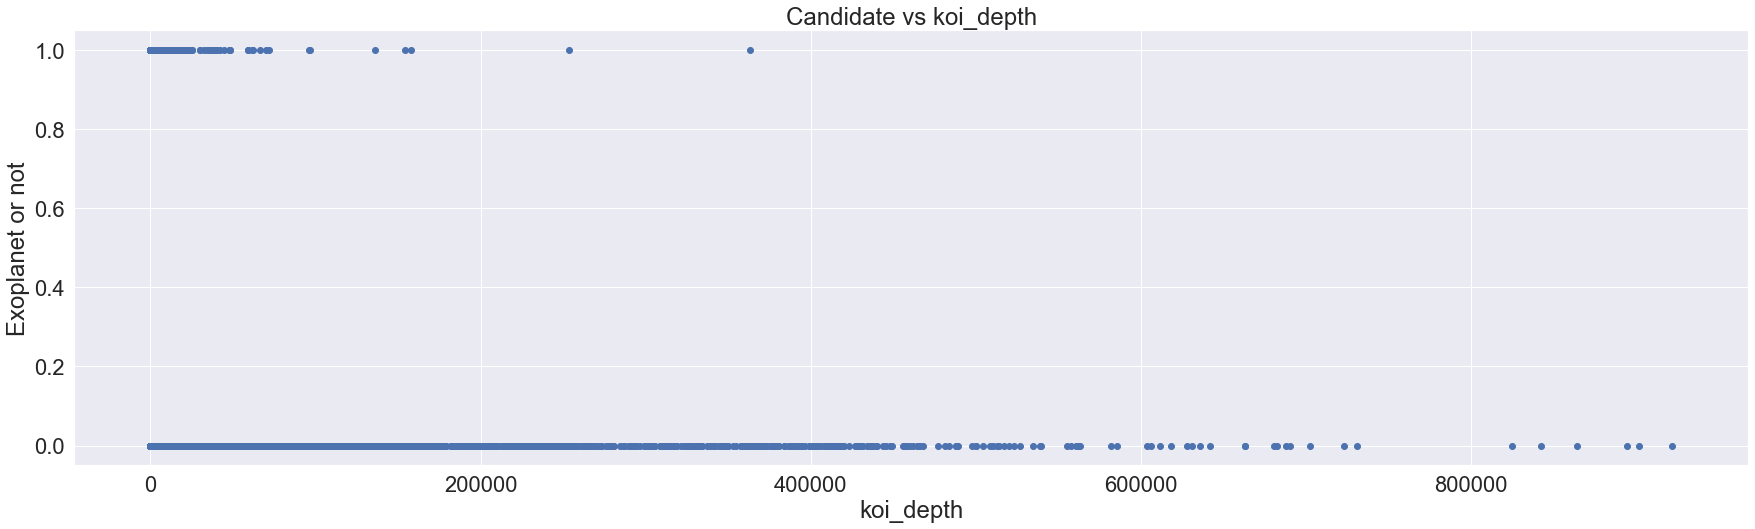

In [28]:
plt.scatter('koi_depth','Exoplanet_candidate',data=df)
plt.xlabel("koi_depth")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs koi_depth")

plt.show()

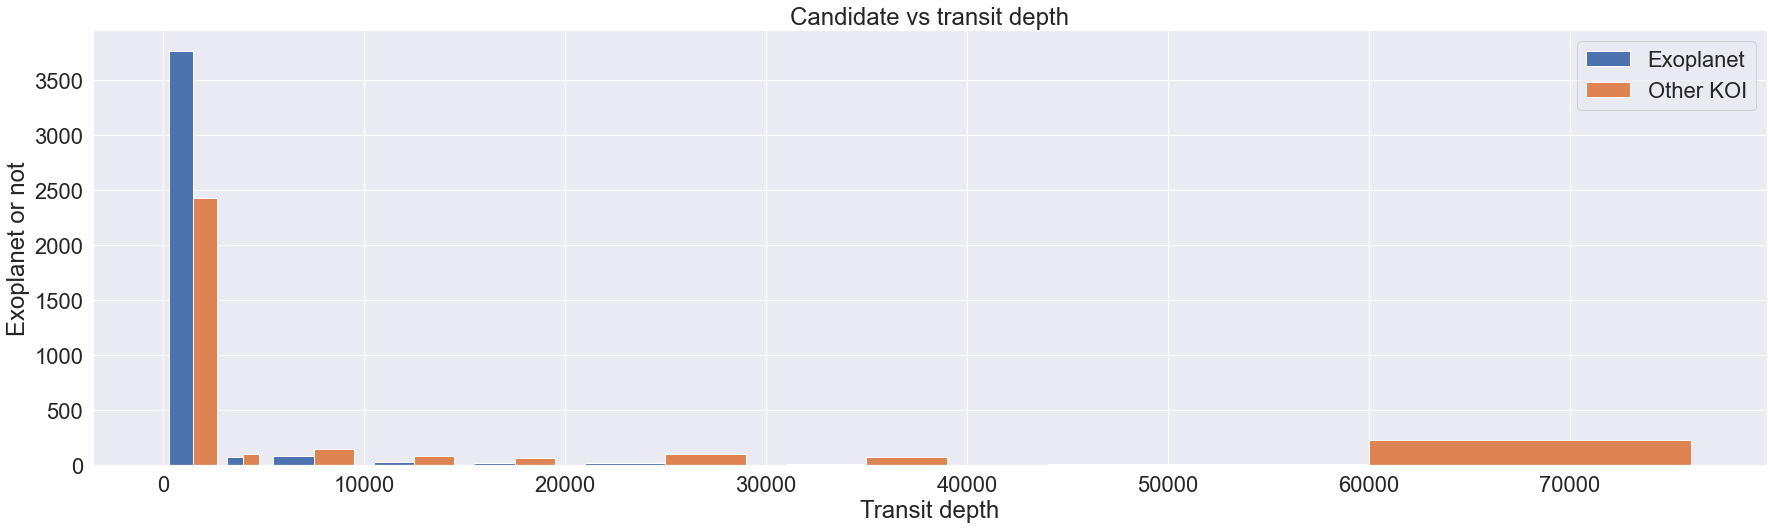

In [29]:
plt.hist([exo['koi_depth'],nonexo['koi_depth']],bins=[0,3000,5000,10000,15000,20000,30000,40000,80000])
plt.xlabel("Transit depth")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs transit depth")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

The higher the stellar flux  lost at the minimum of the planetary transit in ppm, the less likely that the koi is an exoplanet, and most exoplanets have koi_depth value below 3000

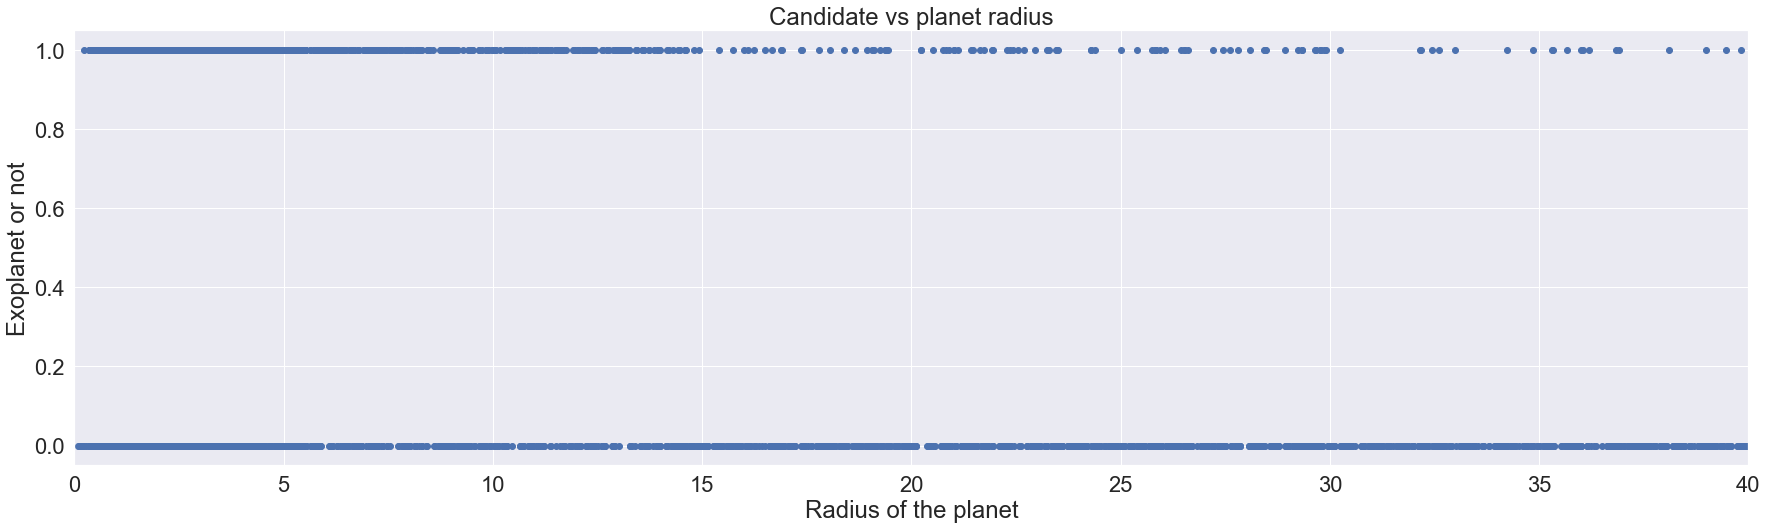

In [216]:
plt.scatter('koi_prad','Exoplanet_candidate',data=df)
plt.xlabel("Radius of the planet")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs planet radius")
plt.xlim(0,40)
plt.show()

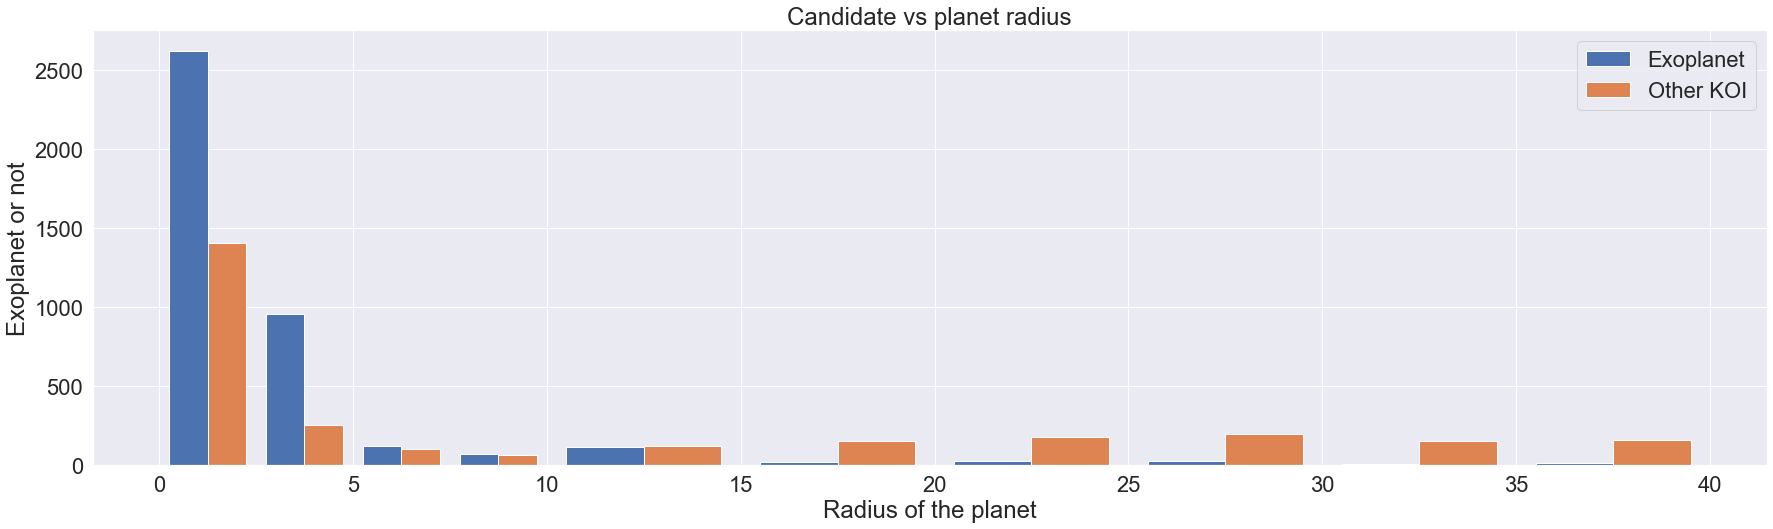

In [32]:
plt.hist([exo['koi_prad'],nonexo['koi_prad']],bins=[0,2.5,5,7.5,10,15,20,25,30,35,40])
plt.xlabel("Radius of the planet")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs planet radius")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

The higher the radius, the less likely that the koi is an exoplanet, most exoplanets have radius below 5 earth radii, kois with radius higher than 15 earth radii are most probably not exoplanets

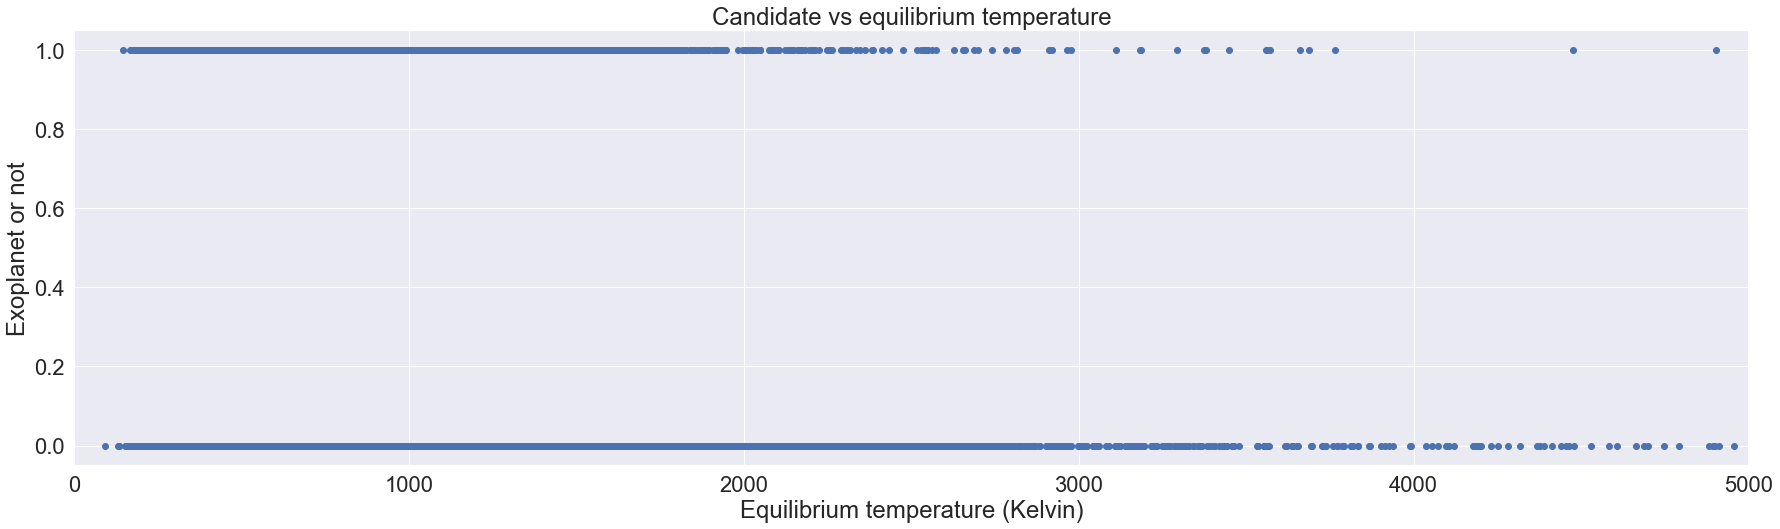

In [219]:
plt.scatter('koi_teq','Exoplanet_candidate',data=df)
plt.xlim(0,5000)
plt.xlabel("Equilibrium temperature (Kelvin)")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs equilibrium temperature")
plt.show()

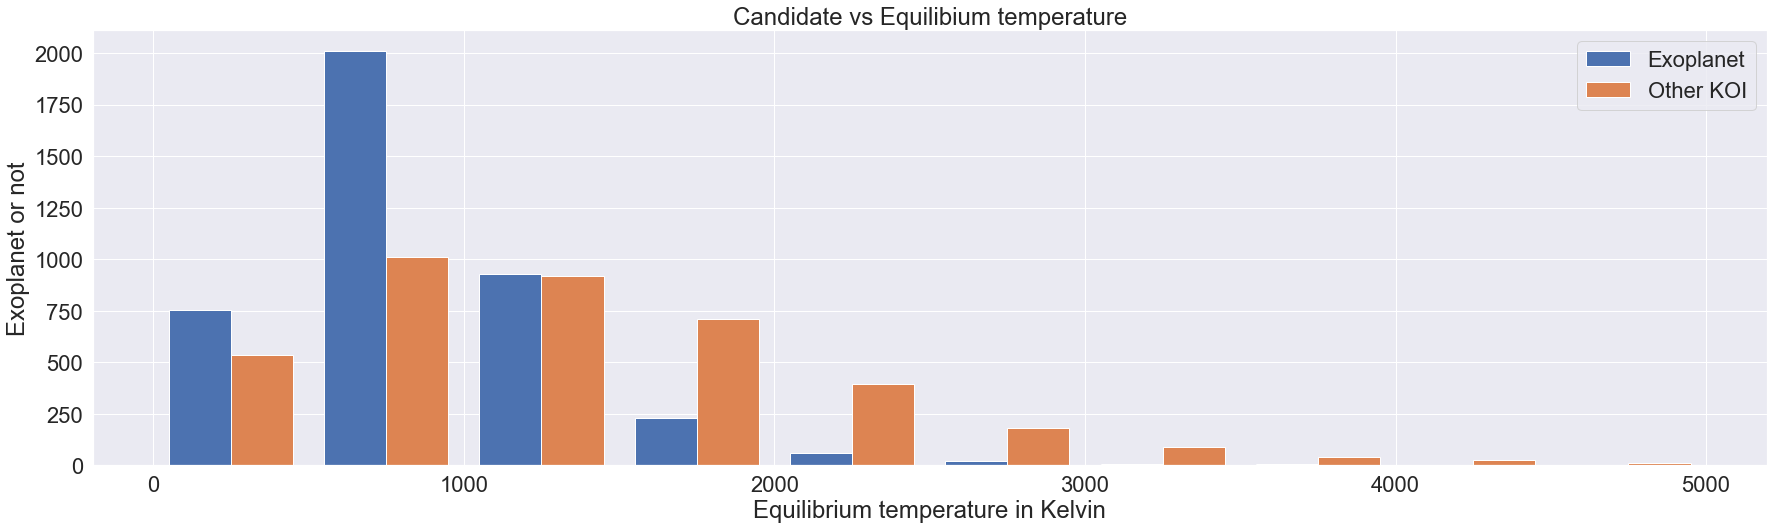

In [33]:
plt.hist([exo['koi_teq'],nonexo['koi_teq']],bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.xlabel("Equilibrium temperature in Kelvin")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs Equilibium temperature")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most exoplanets have an equilibrium temperature of below 1500K and a koi with higher equilibrium temperature is most probably not an exoplanet

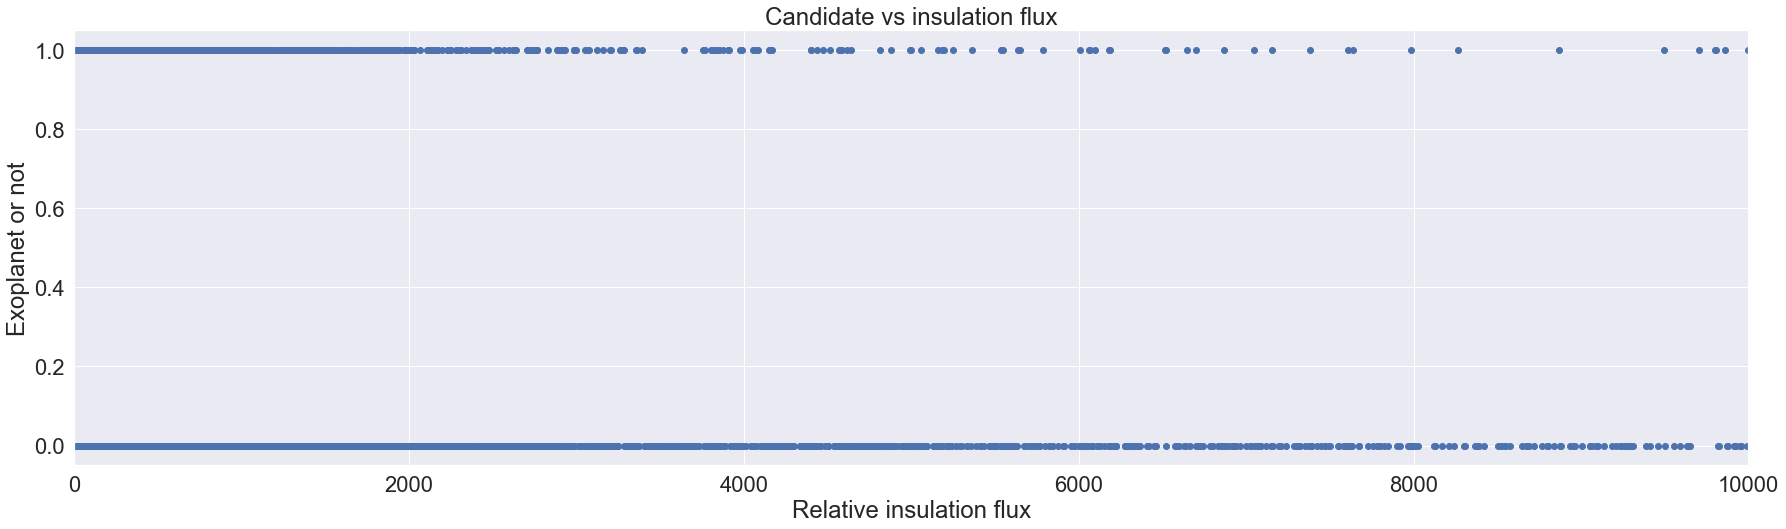

In [224]:
plt.scatter('koi_insol','Exoplanet_candidate',data=df)
plt.xlim(0.0,10000)
plt.xlabel("Relative insulation flux")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs insulation flux")
plt.show()

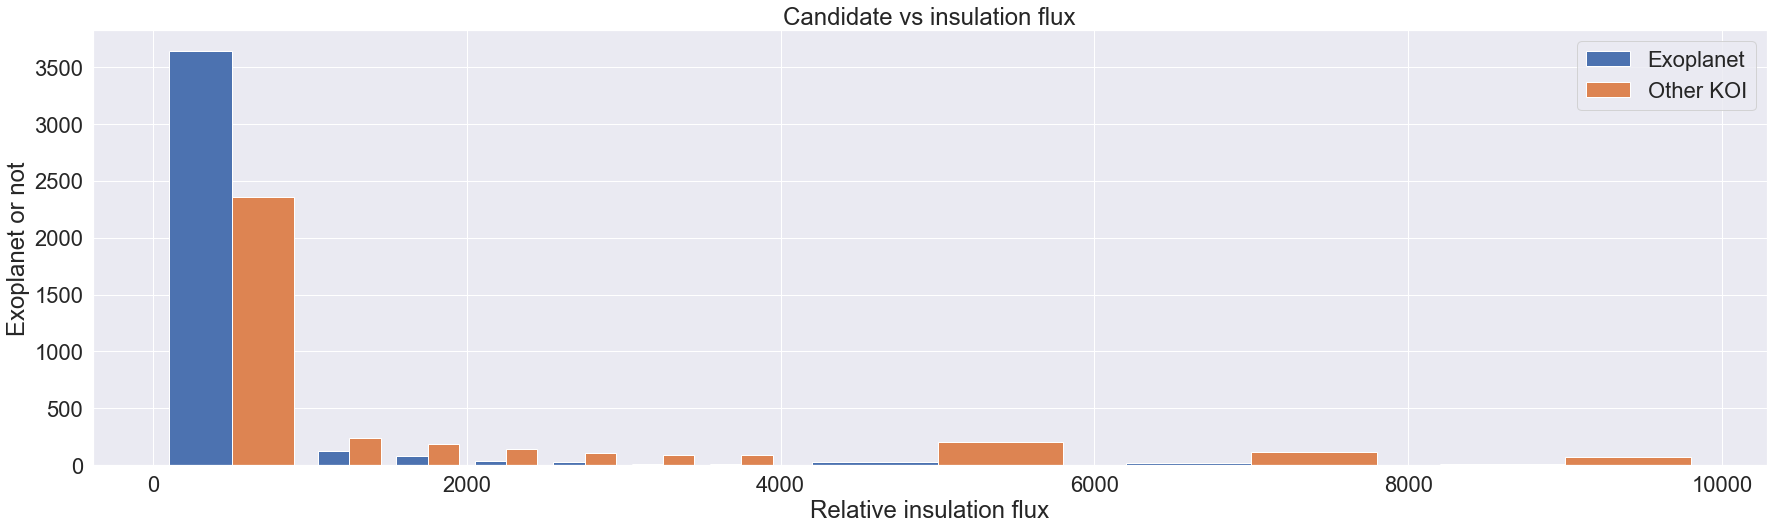

In [34]:
plt.hist([exo['koi_insol'],nonexo['koi_insol']],bins=[0,1000,1500,2000,2500,3000,3500,4000,6000,8000,10000])
plt.xlabel("Relative insulation flux")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs insulation flux")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most exoplanets have relative insulation flux below 1000, and any koi with higher flux is most probably not an exoplanet

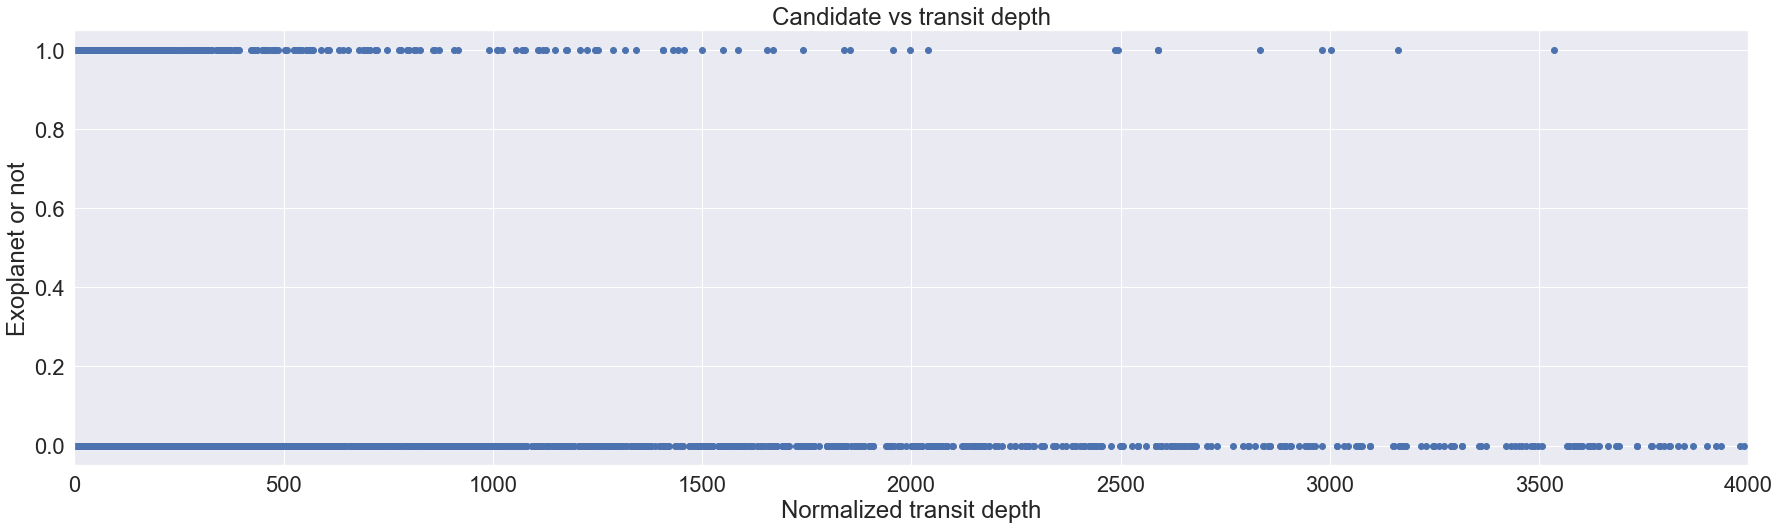

In [35]:
plt.scatter('koi_model_snr','Exoplanet_candidate',data=df)
plt.xlim(0,4000)
plt.xlabel("Normalized transit depth")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs transit depth")
plt.show()

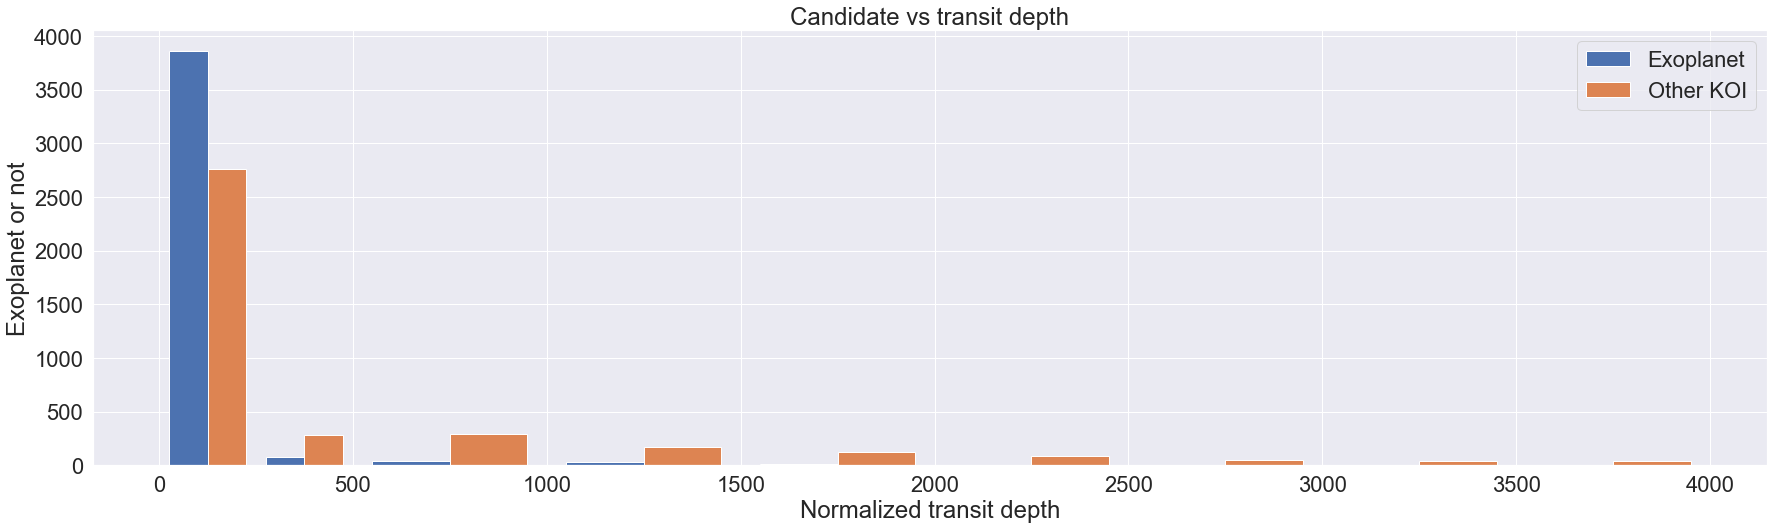

In [37]:
plt.hist([exo['koi_model_snr'],nonexo['koi_model_snr']],bins=[0,250,500,1000,1500,2000,2500,3000,3500,4000])
plt.xlabel("Normalized transit depth")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs transit depth")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most exoplanets have relative transit depth below 250 and any koi with higher transit depth is not an exoplanet

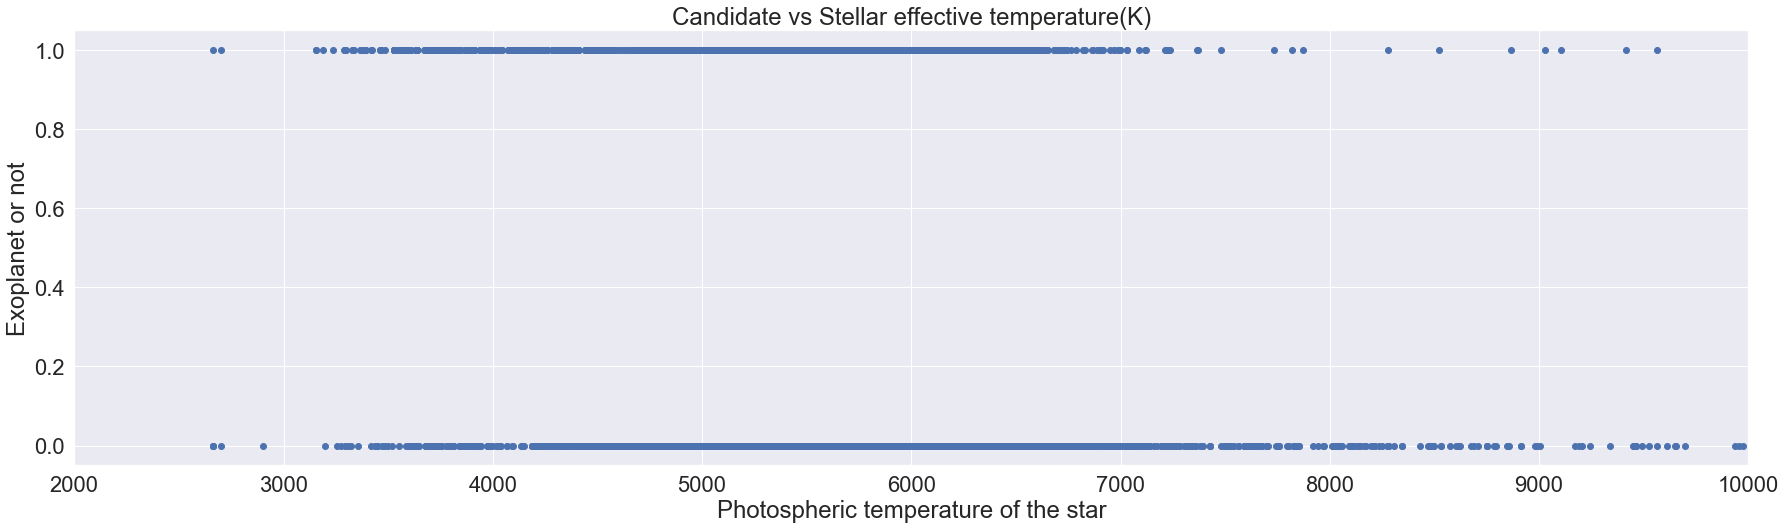

In [227]:
plt.scatter('koi_steff','Exoplanet_candidate',data=df)
plt.xlabel("Photospheric temperature of the star")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs Stellar effective temperature(K)")
plt.xlim(2000,10000)
plt.show()

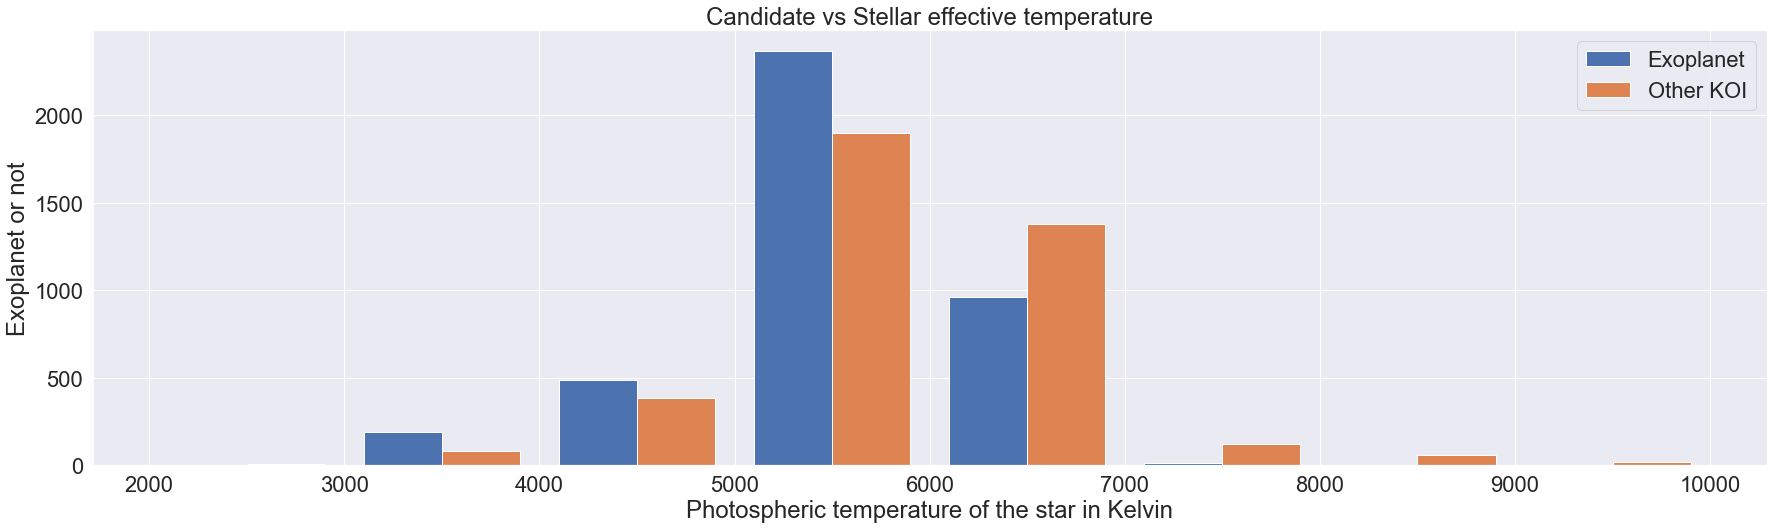

In [39]:
plt.hist([exo['koi_steff'],nonexo['koi_steff']],bins=[2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.xlabel("Photospheric temperature of the star in Kelvin")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs Stellar effective temperature")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

The photospheric temperature of the star of an exoplanet is most likely in between 3000-7000k and higher temperature kois are mostly not exoplanets

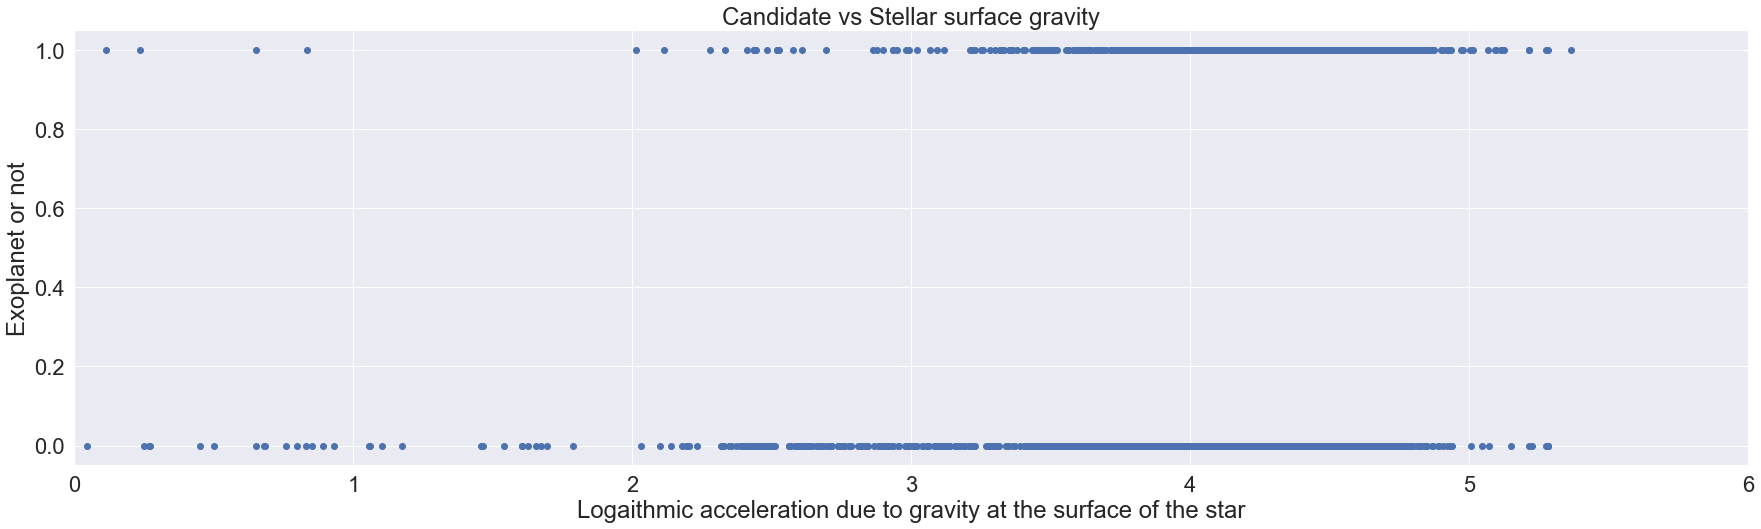

In [228]:
plt.scatter('koi_slogg','Exoplanet_candidate',data=df)
plt.xlabel("Logaithmic acceleration due to gravity at the surface of the star")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs Stellar surface gravity")
plt.xlim(0,6)
plt.show()

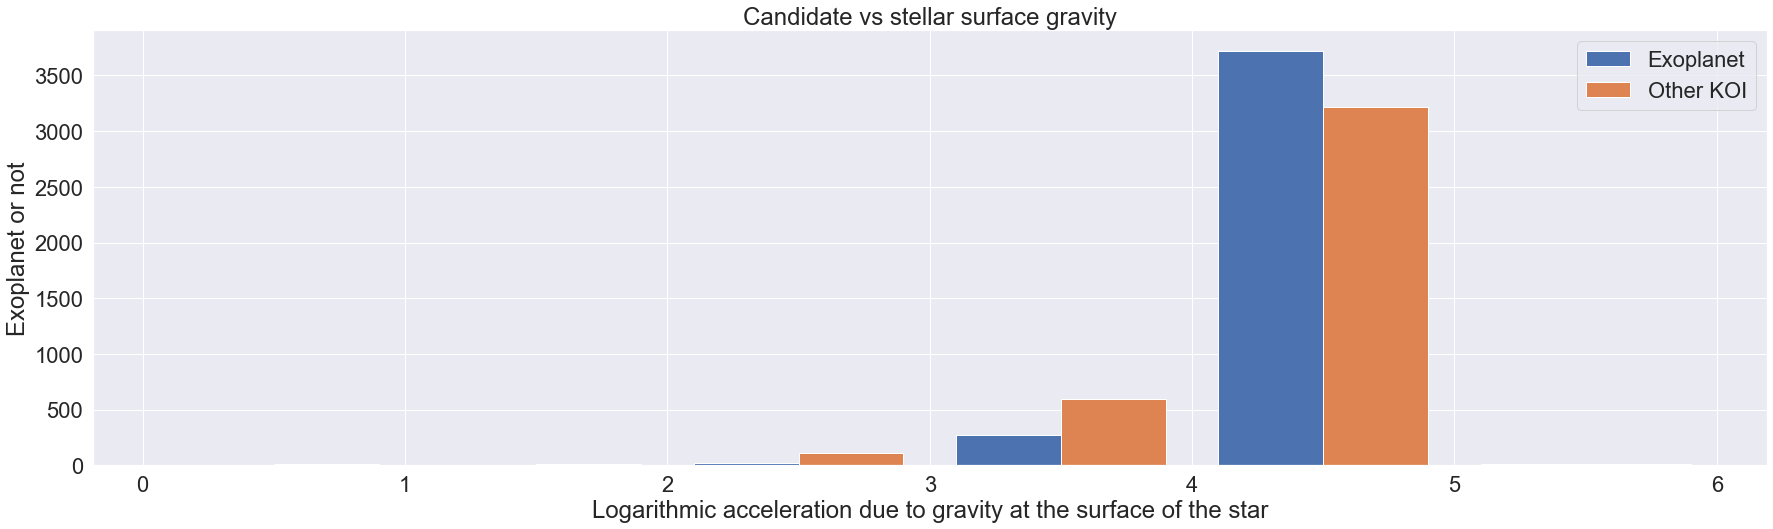

In [40]:
plt.hist([exo['koi_slogg'],nonexo['koi_slogg']],bins=[0,1,2,3,4,5,6])
plt.xlabel("Logarithmic acceleration due to gravity at the surface of the star")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs stellar surface gravity")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most exoplanets have stellar surface gravity between 3 and 5

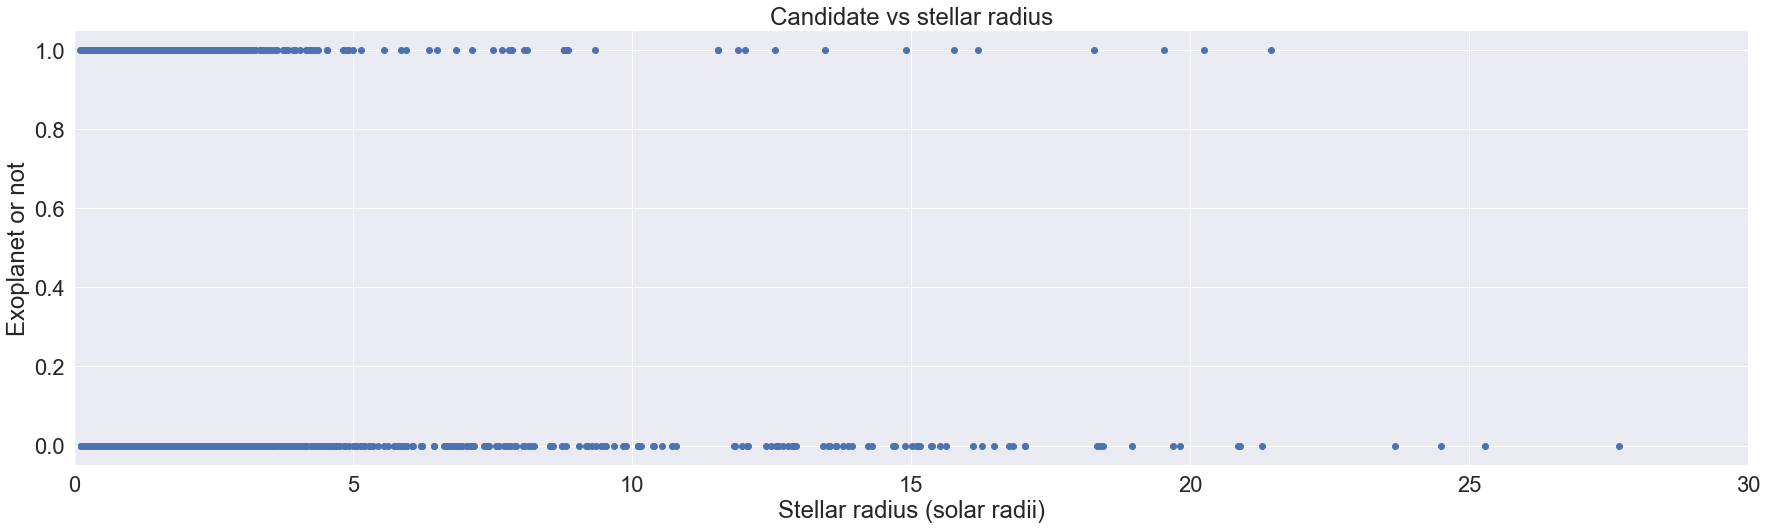

In [232]:
plt.scatter('koi_srad','Exoplanet_candidate',data=df)
plt.xlabel("Stellar radius (solar radii)")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs stellar radius")
plt.xlim(0,30)
plt.show()

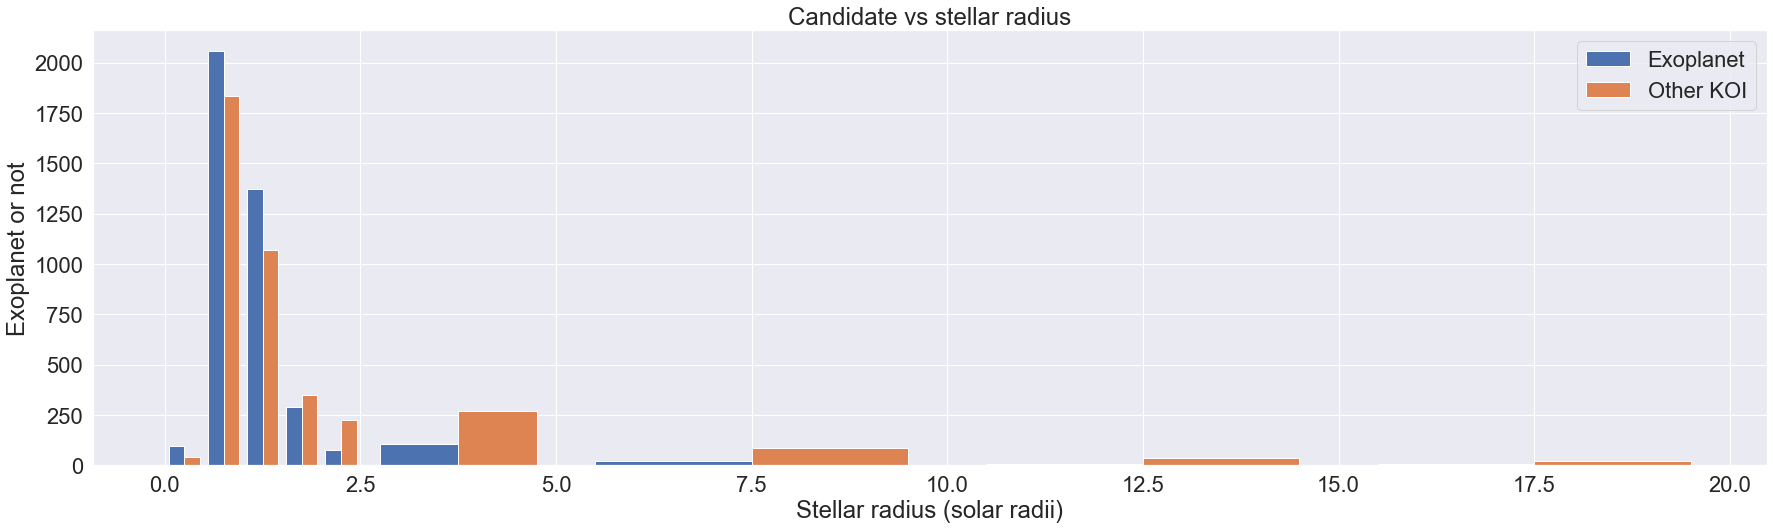

In [30]:
plt.hist([exo['koi_srad'],nonexo['koi_srad']],bins=[0,0.5,1.0,1.5,2.0,2.5,5,10,15,20])
plt.xlabel("Stellar radius (solar radii)")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs stellar radius")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Most exoplanets have stellar radius less than 2.5 solar radii and a koi with higher stellar radius is most probably not an exoplanet

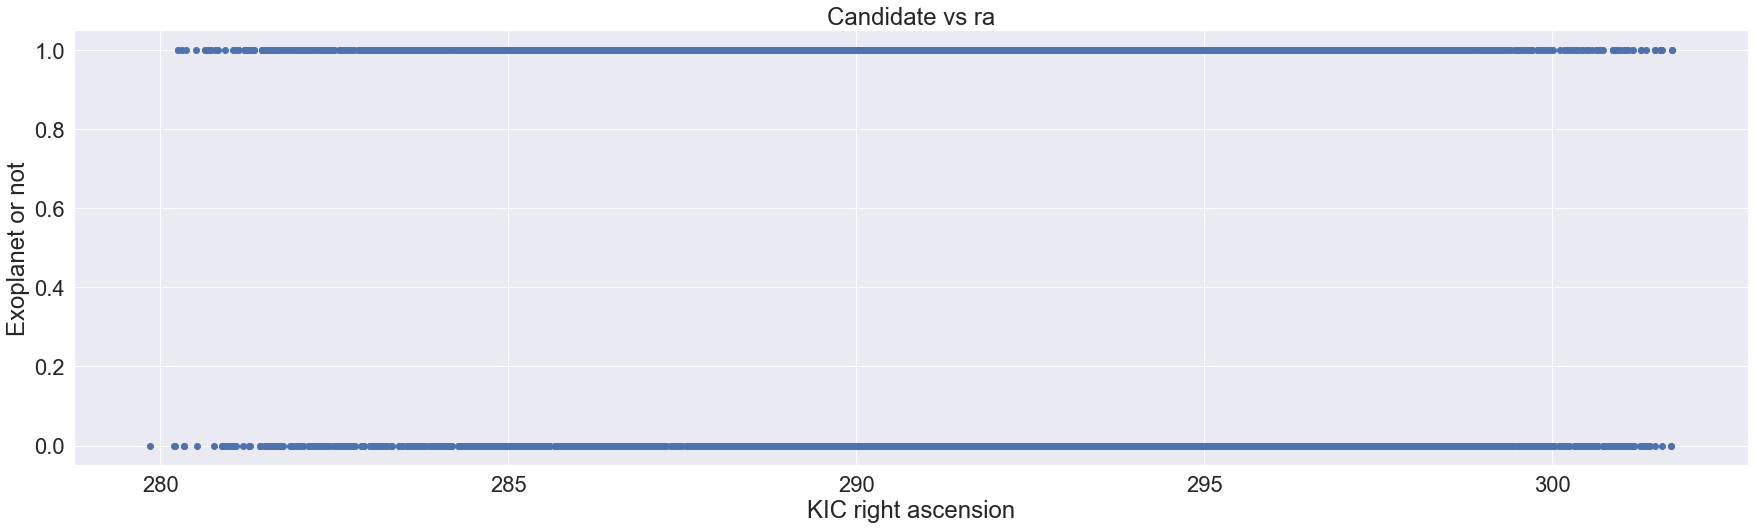

In [233]:
plt.scatter('ra','Exoplanet_candidate',data=df)
plt.xlabel("KIC right ascension")
plt.ylabel('Exoplanet or not')
plt.title("Candidate vs ra")
plt.show()

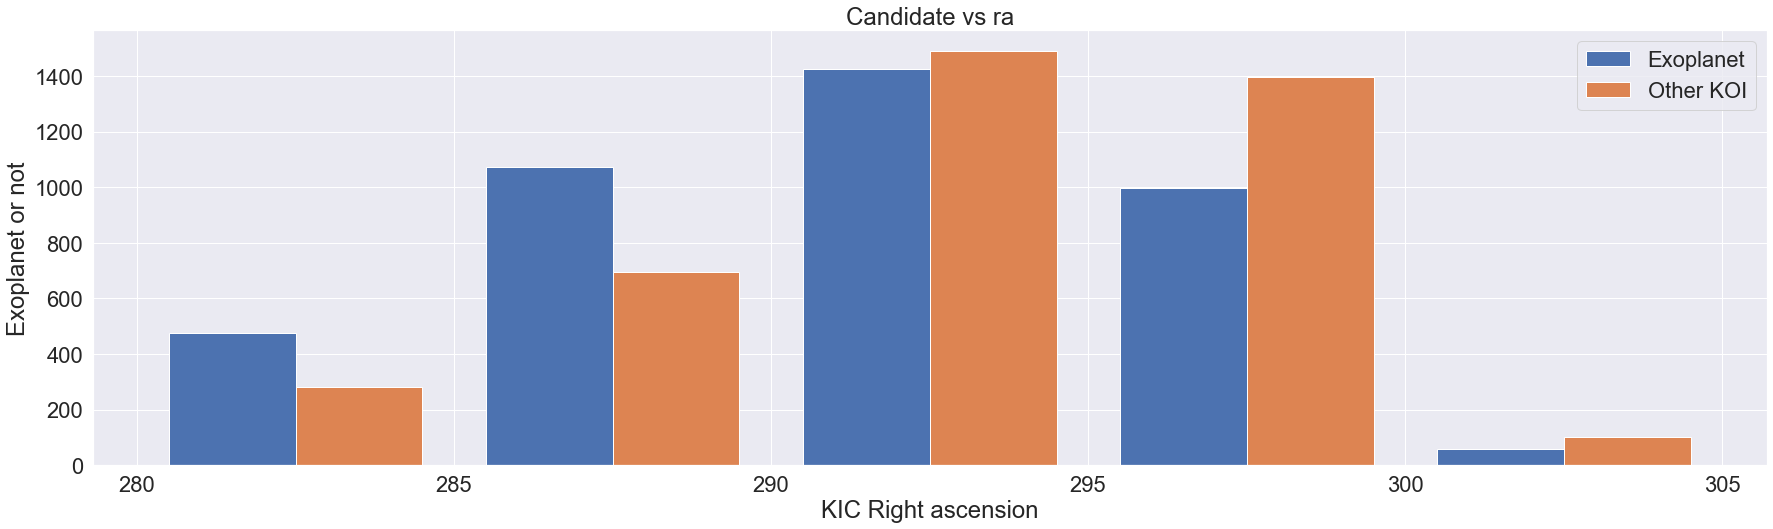

In [43]:
plt.hist([exo['ra'],nonexo['ra']],bins=[280,285,290,295,300,305])
plt.xlabel("KIC Right ascension")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs ra")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

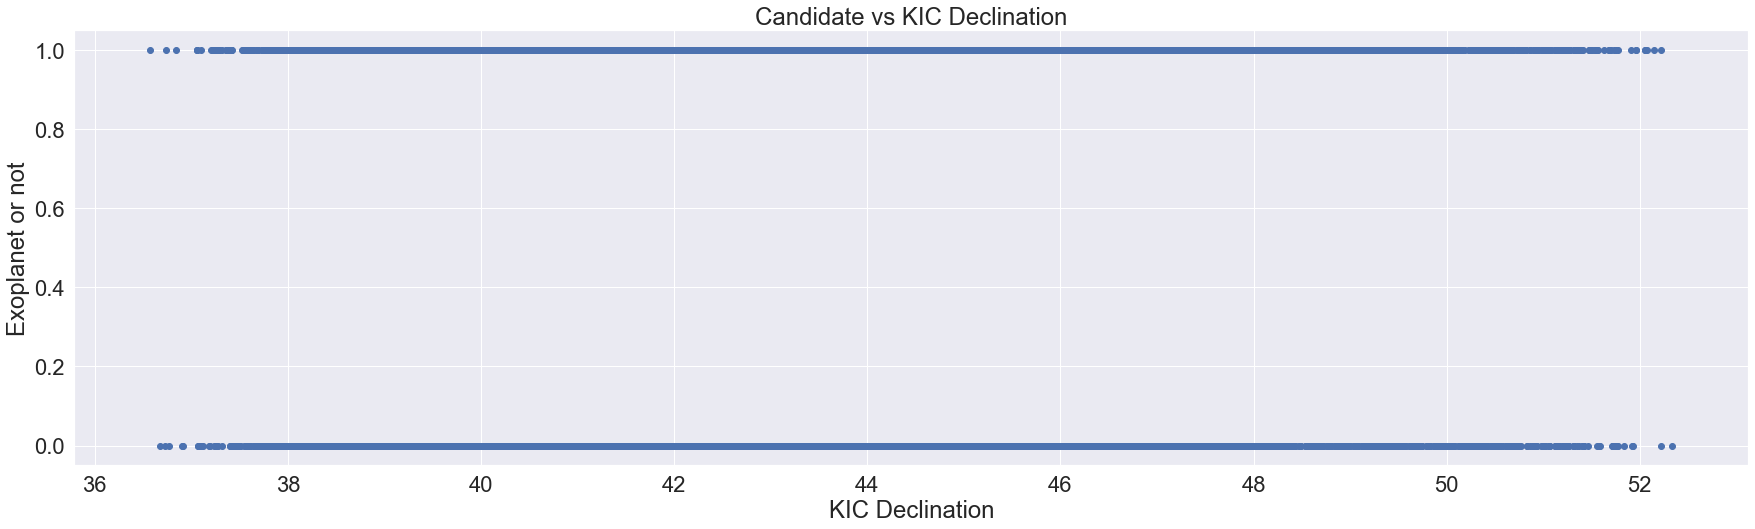

In [45]:
plt.scatter('dec','Exoplanet_candidate',data=df)
plt.xlabel("KIC Declination")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs KIC Declination")
plt.show()

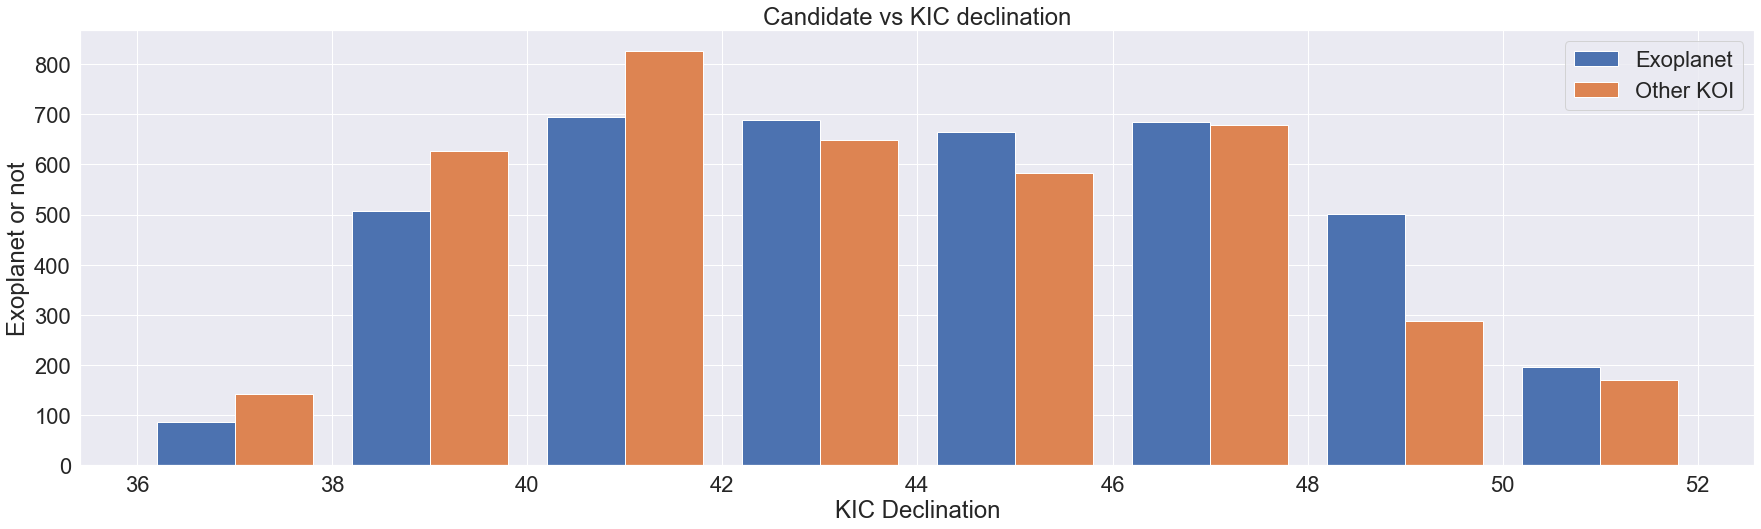

In [46]:
plt.hist([exo['dec'],nonexo['dec']],bins=[36,38,40,42,44,46,48,50,52])
plt.xlabel("KIC Declination")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs KIC declination")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

RA range,declarations are almost the same for exoplanets and other kois

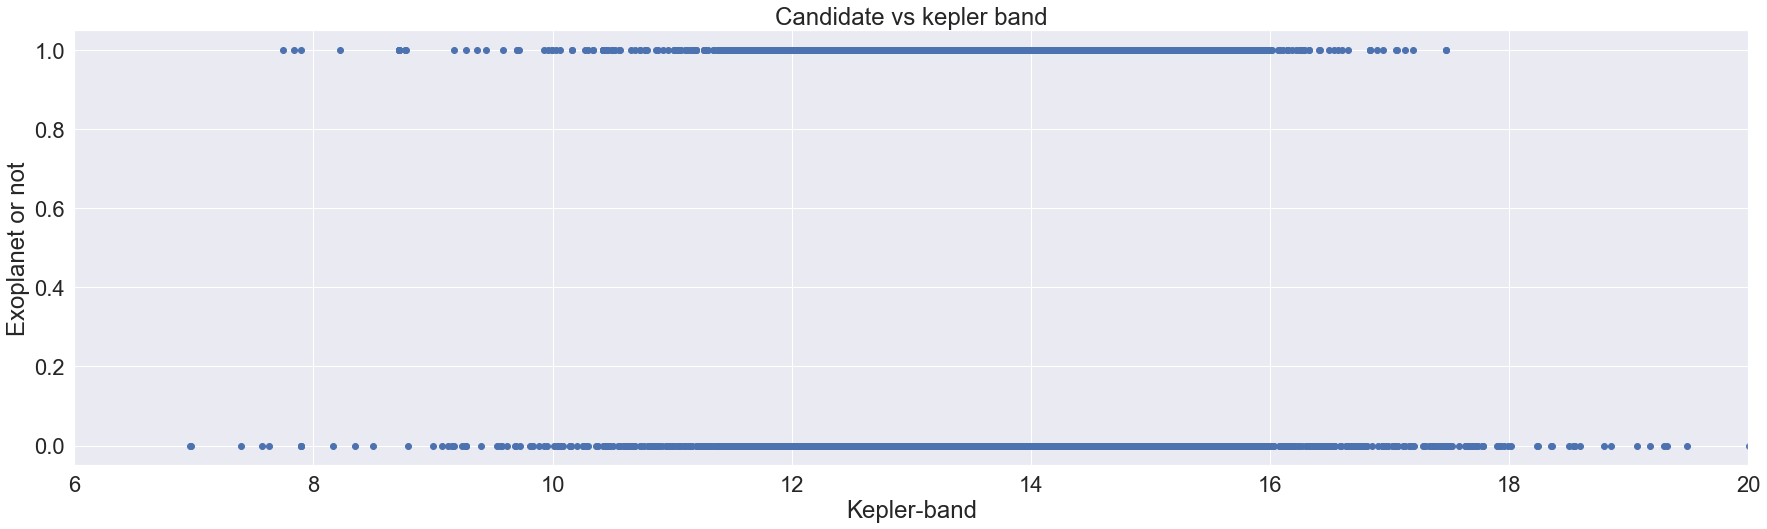

In [238]:
plt.scatter('koi_kepmag','Exoplanet_candidate',data=df)
plt.xlabel("Kepler-band")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs kepler band")
plt.xlim(6,20)
plt.show()

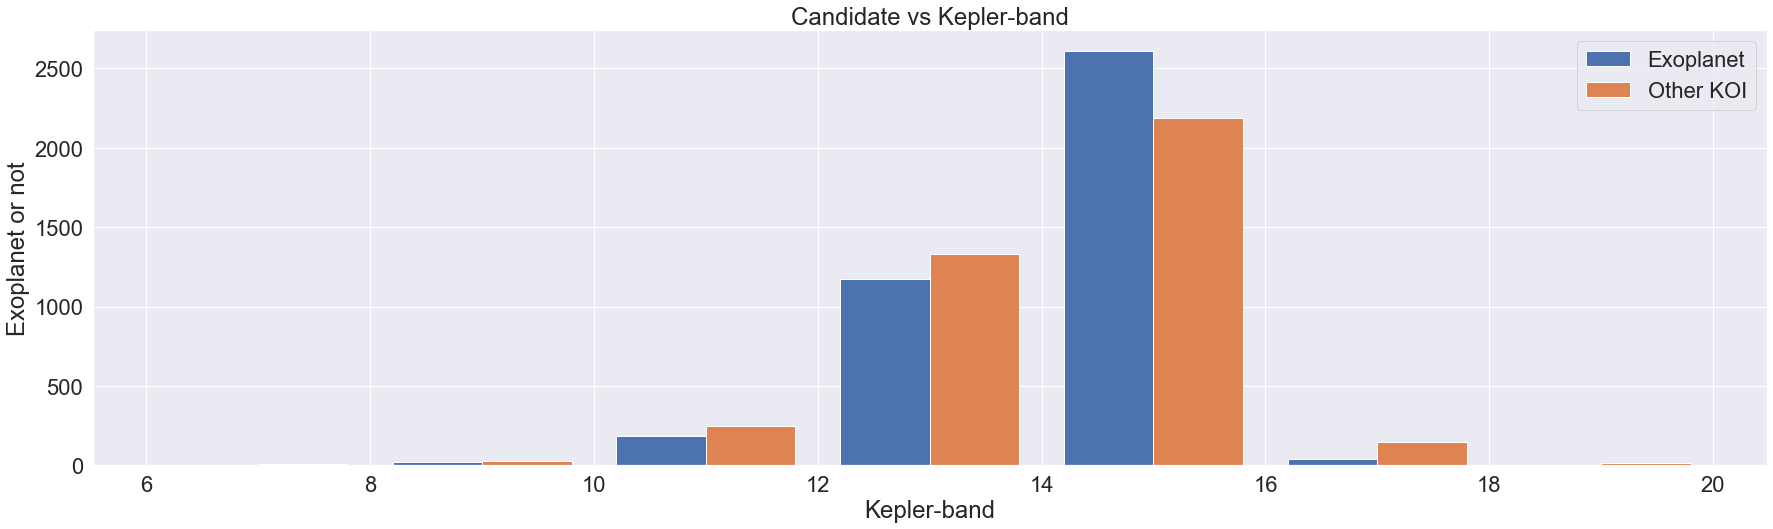

In [47]:
plt.hist([exo['koi_kepmag'],nonexo['koi_kepmag']],bins=[6,8,10,12,14,16,18,20])
plt.xlabel("Kepler-band")
plt.ylabel("Exoplanet or not")
plt.title("Candidate vs Kepler-band")
plt.legend(['Exoplanet','Other KOI'])
plt.show()

Kepler mag  is almost the same for exoplanets and other kois

In [47]:
#Splitting training data and testing data, feature vaiable and prediction variable
X = df.drop(columns=['Exoplanet_candidate','Exoplanet_confirmed'])
y = df.Exoplanet_candidate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.40)

In [57]:
# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
def metric(y_test,y_pred):
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_test, y_pred))
    

In [58]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
metric(y_test,y_pred)

Evaluation Metrics:
Accuracy: 0.7964352720450282
Recall: 0.884312537855845
F1 Score: 0.8176981237748528
Precision: 0.7604166666666666

Confusion Matrix:
 TN,  FP, FN, TP
[[1087  460]
 [ 191 1460]]


C:\Users\Sneha K K\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metric(y_test,y_pred)

Evaluation Metrics:
Accuracy: 0.783927454659162
Recall: 0.7946698970321018
F1 Score: 0.791553544494721
Precision: 0.7884615384615384

Confusion Matrix:
 TN,  FP, FN, TP
[[1195  352]
 [ 339 1312]]


In [60]:
#Decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
metric(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9909318323952471
Recall: 0.9884918231374924
F1 Score: 0.9911934406316427
Precision: 0.9939098660170523

Confusion Matrix:
 TN,  FP, FN, TP
[[1537   10]
 [  19 1632]]


In [61]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
metric(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9921826141338337
Recall: 0.9848576620230164
F1 Score: 0.9923710711016174
Precision: 1.0

Confusion Matrix:
 TN,  FP, FN, TP
[[1547    0]
 [  25 1626]]


Conclusions:
* 2652 exoplanets have been confirmed so far by NASA ( as on 14-08-2022)
* Impact parameter, transit duration,flux and radius(planetary and stellar) are some of the most important deciding factors on whether a koi has an exoplanet or not.
* We were able to predict with a 99% accuracy whether our observations is an exoplanet or not. Random forest classifier was the most accurate model.